# LEAD SCORING CASE STUDY-  AKILA BALASUNDARAM

## PROBLEM STATEMENT:

An education company named as (X Education) sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

# BUSINESS PROBLEM

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# DATA PROVIDED

Provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. 

The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. 

Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

# GOAL OF A CASE STUDY

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


### IMPORT LIBRARIES AND SUPRESS WARNINGS

In [1]:
# Supress warnings

import warnings
warnings.filterwarnings("ignore")

#Import the required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 500)

# Data understanding, preparation and EDA

#####  Importing dataset

In [3]:
#leads_df=pd.read_csv(r"F:\UpgradLearningMeenal\Machine Learning\CASE STUDY\Lead Scoring Assignment\Leads.csv")
leads_df = pd.read_csv("Leads.csv") 
leads_df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


From the data we can see some entries with 'Select' and some are 'NaN'. We will have a look at it in further analysis.

###### Data Inspect


In [4]:
leads_df.shape

(9240, 37)

 Data frame contains 9240 rows and 37 columns

##### Checking the Summary Statistics for better understanding of the data.

In [5]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


 We can view the basic  statistical details of the dataset like count, mean, percentiles, min and max. Also, we can get a rough idea about the outliers from the summary of the dataset. There are some outlieres, we will detect the outliers in further analysis.

##### Checking duplicates


In [6]:
duplicate = leads_df[leads_df.duplicated()]
duplicate

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicates in the data.

##### Replacing the categorical columns containing 'SELECT' entries with 'OTHERS'.

In [7]:
#Entries with 'Select' have been replaced with 'OTHERS'
leads_df = leads_df.replace({'Select':'OTHERS','select':'OTHERS'})


Also some fields like **"lead profile","city","How did you hear about X Education"** has value as `select` ,which means nothing has been choosen from the drop down field. we can very well update this **select**  in these fields to **OTHERS**.


In [8]:
leads_df.shape

(9240, 37)

##### Checking the datatypes if imported correctly using info()


In [9]:
leads_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like columns have been imported into correct datatype, but there are few columns having missing values, let's check the missing value percentage.

##### Check the Null/missing value percentages

In [10]:
(round((leads_df.isnull().sum()/len(leads_df)),2)*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

There are significant amount of missing data in our dataset. Let check the columns accordingly.

##### Let's look at the categorical columns first and take the necessary step

In [11]:
# Selecting categorical columns

leads_df.select_dtypes(include=['object']).columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [12]:
# Let's check the percent missing values for the categorical columns

round((leads_df.select_dtypes(include=['object']).isnull().sum()/len(leads_df)),2)*100

Prospect ID                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement                             0.0
Through Recommendations                           0.0
Receive More Updates About O

##### Clearly, 3 categorical columns whose missing value lies between 40-50 % can be seen. Let's visulize with respect to target variable & check their influence.

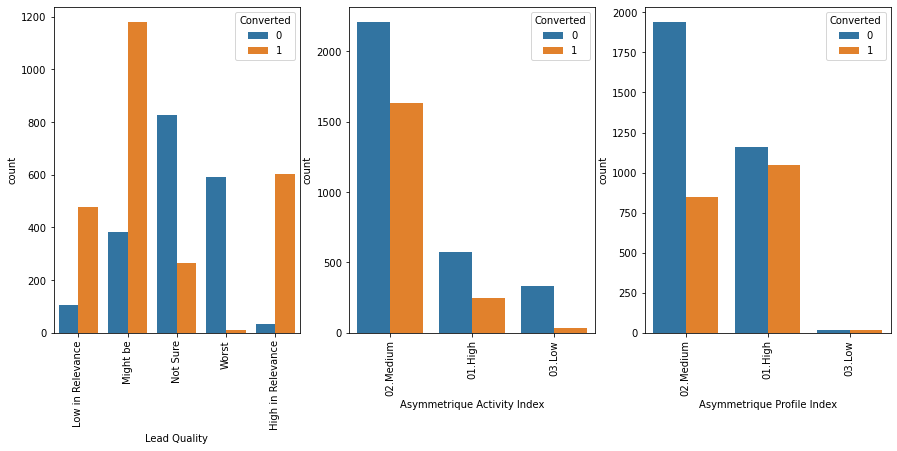

In [13]:

plt.figure(figsize=[15,6])

plt.subplot(1,3,1)
s1=sns.countplot(leads_df['Lead Quality'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.subplot(1,3,2)
s1=sns.countplot(leads_df['Asymmetrique Activity Index'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.subplot(1,3,3)
s1=sns.countplot(leads_df['Asymmetrique Profile Index'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.show()

From the above visulization, we are unable to get the clear conversion information, whether conversion is high or not.
From the subplots,The percentage is much higer for converted=0 as compared to converted=1 for all the three columns, thus, information is not clear abpout the conversion rate.Though around 20 - 30% of the data for all three variables has '1' for converted, Due to high missing values, there is no sufficient information if they influence conversion, so we will go ahead and remove these columns from the data 

In [14]:
# Dropping Asymmetrique Activity Index,Asymmetrique Profile Index,Lead Quality columns

leads_df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Lead Quality'],axis=1, inplace=True)
leads_df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,OTHERS,OTHERS,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,OTHERS,OTHERS,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,OTHERS,OTHERS,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,OTHERS,OTHERS,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,OTHERS,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,14.0,20.0,No,Yes,Email Opened


In [15]:
# now lets check the categorical variables having more than 20% of missing data.

print(leads_df.Country.value_counts(normalize=True)*100) 
print('\n')
print(leads_df.Specialization.value_counts(normalize=True)*100) 
print('\n')
print(leads_df['How did you hear about X Education'].value_counts(normalize=True)*100)
print('\n')
print(leads_df['What is your current occupation'].value_counts(normalize=True)*100)
print('\n')
print(leads_df['What matters most to you in choosing a course'].value_counts(normalize=True)*100)
print('\n')
print(leads_df['Lead Profile'].value_counts(normalize=True)*100)
print('\n')
print(leads_df['City'].value_counts(normalize=True)*100)

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Germany                  0.059006
South Africa             0.059006
Nigeria                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
Belgium                  0.029503
Philippines              0.029503
Uganda                   0.029503
Italy                    0.029503
Bangladesh               0.029503
China                    0.029503
Ghana                    0.029503
Asia/Pacific Region      0.029503
Netherlands              0.029503
Switzerland              0.014751
Russia        

Instead of using mode, let's impute/replace the categorical column having missing entries with the 'OTHERS', because imputing with mode will add the bias behaviour to the data. 

In [16]:
# Replace Null values with OTHERS

for fields in ['Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Profile','City']:
    leads_df[fields].fillna(value='OTHERS',inplace=True)
    print(leads_df[fields].isna().sum())

0
0
0
0
0
0
0


In [17]:
print(leads_df.Country.value_counts(normalize=True)*100) 
print('\n')
print(leads_df.Specialization.value_counts(normalize=True)*100) 
print('\n')
print(leads_df['How did you hear about X Education'].value_counts(normalize=True)*100) 
print('\n')
print(leads_df['What is your current occupation'].value_counts(normalize=True)*100) 
print('\n')
print(leads_df['What matters most to you in choosing a course'].value_counts(normalize=True)*100) 
print('\n')
print(leads_df['Lead Profile'].value_counts(normalize=True)*100)
print('\n')
print(leads_df['City'].value_counts(normalize=True)*100)

India                   70.259740
OTHERS                  26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Germany                  0.043290
South Africa             0.043290
Nigeria                  0.043290
Canada                   0.043290
Kuwait                   0.043290
Sweden                   0.032468
Uganda                   0.021645
Philippines              0.021645
Italy                    0.021645
Bangladesh               0.021645
China                    0.021645
Belgium                  0.021645
Asia/Pacific Region      0.021645
Netherlands              0.021645
Ghana                    0.021645
Switzerland   

##### Let's now select the numeric columns

In [18]:
leads_df.select_dtypes(include=['number']).columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [19]:
round((leads_df.select_dtypes(include=['number']).isnull().sum()/len(leads_df)),2)*100

Lead Number                     0.0
Converted                       0.0
TotalVisits                     1.0
Total Time Spent on Website     0.0
Page Views Per Visit            1.0
Asymmetrique Activity Score    46.0
Asymmetrique Profile Score     46.0
dtype: float64

If we see 'Asymmetrique Activity Score' and 'Asymmetrique Profile Score' have the missing values more than 40%. Let's check these columns with respect to Converted i.e Target Column

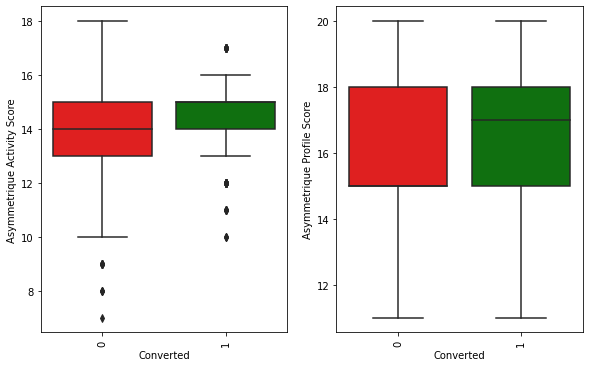

In [20]:
plt.figure(figsize=[15,6])

plt.subplot(1,3,1)
s1=sns.boxplot(x='Converted',y='Asymmetrique Activity Score',data=leads_df,palette=["red","green"])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.subplot(1,3,2)
s1=sns.boxplot(x='Converted',y='Asymmetrique Profile Score',data=leads_df,palette=["red","green"])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.show()


From the above visulization, we can't draw a much insight from `Asymmetrique Profile Score`, no effect can be seen on conversion rate. However, some insight can be viewed from `Asymmetrique Activity Score`, the Conveted=1 profile scores are higher than Converted=1(Converted ones), Overall,their interquartile range does not give any information and with missing data they dont add much value to analysis. We will descide to drop them.  

In [21]:
leads_df.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score'],axis=1, inplace=True)
leads_df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,OTHERS,OTHERS,OTHERS,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,OTHERS,OTHERS,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,OTHERS,OTHERS,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,OTHERS,OTHERS,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,OTHERS,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened


In [22]:
((leads_df.isnull() | leads_df.isna()).sum() * 100 / leads_df.index.size).round(2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

###### Now, we can see the column 'Tags' having 36 % missing data. Let's look at the value counts of it.

In [23]:
leads_df.Tags.value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

##### Let's visualize Tags column with the Target

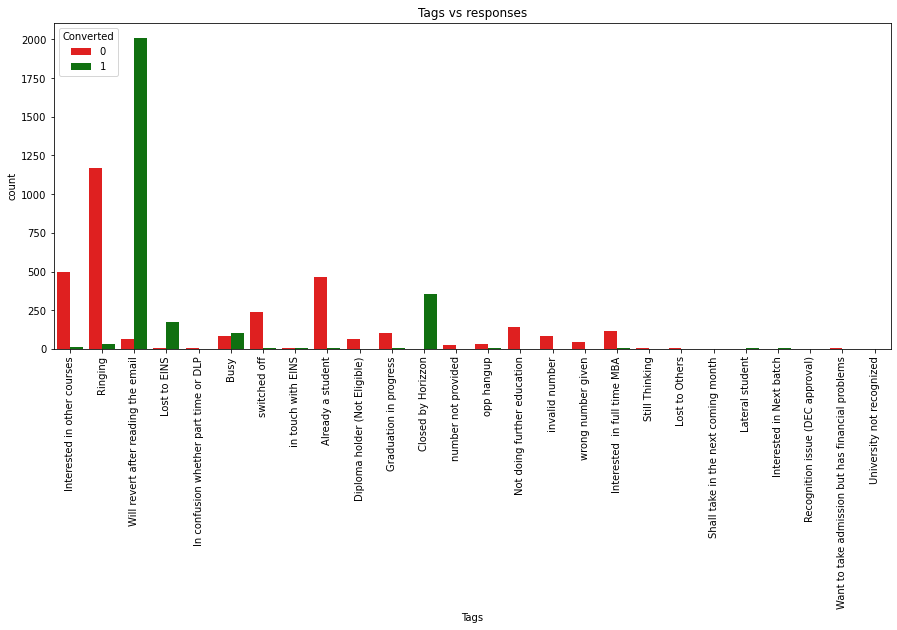

In [24]:
plt.figure(figsize=[15,6])
s1=sns.countplot(leads_df['Tags'], hue=leads_df.Converted,palette=(['red','green']))
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title("Tags vs responses")
plt.show()


Out of all the responses , we could see the conversion rate is  high when the response is **" will revert back after reading the email"**. We do not want to lose this information, so we will **derive another feature** from this column named **"Tag response:"revert after reading email"** and make `1` for this response and `0 for all other responses`.

further we will drop "Tags" variable from our dataframe.


In [25]:
# creating new feature Tag:response after reading email from Tag column

leads_df['Tag:response after reading email']=leads_df.Tags.map(lambda x:'Yes' if x == "Will revert after reading the email" else 'No')
leads_df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Tag:response after reading email
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,OTHERS,OTHERS,OTHERS,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,OTHERS,OTHERS,No,No,Modified,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,OTHERS,OTHERS,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,OTHERS,OTHERS,No,No,Email Opened,No


In [26]:
# dropping the tag column since it has too many missing columns and we have extracted the information needed by us into another column
leads_df.drop(['Tags'],axis=1,inplace=True)
leads_df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Tag:response after reading email
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,OTHERS,OTHERS,OTHERS,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,OTHERS,OTHERS,No,No,Modified,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,OTHERS,OTHERS,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,OTHERS,OTHERS,No,No,Email Opened,No


In [27]:
# Let's again check the missing value percentage if any

((leads_df.isnull() | leads_df.isna()).sum() * 100 / leads_df.index.size).round(2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

Still some missing values can be seen, let's see how to deal with them

In [28]:
# add the columns with meager amount of missing data into list

var_null_remaining=[]
for columns in leads_df.columns:
    if leads_df[columns].isna().sum()/leads_df.index.size*100 >=0.01:
        var_null_remaining.append(columns)
var_null_remaining

['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity']

In [29]:
# drop the records with meager amount of missing data using their index

for column in var_null_remaining:
    column_meager=leads_df[leads_df[column].isnull()].index
    leads_df.drop(index=column_meager,axis=0,inplace=True)

In [30]:
((leads_df.isnull() | leads_df.isna()).sum() * 100 / leads_df.index.size).round(2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

Thus All the missing values are handled.

### Outlier Detection

In [31]:
# Outlier detection

leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


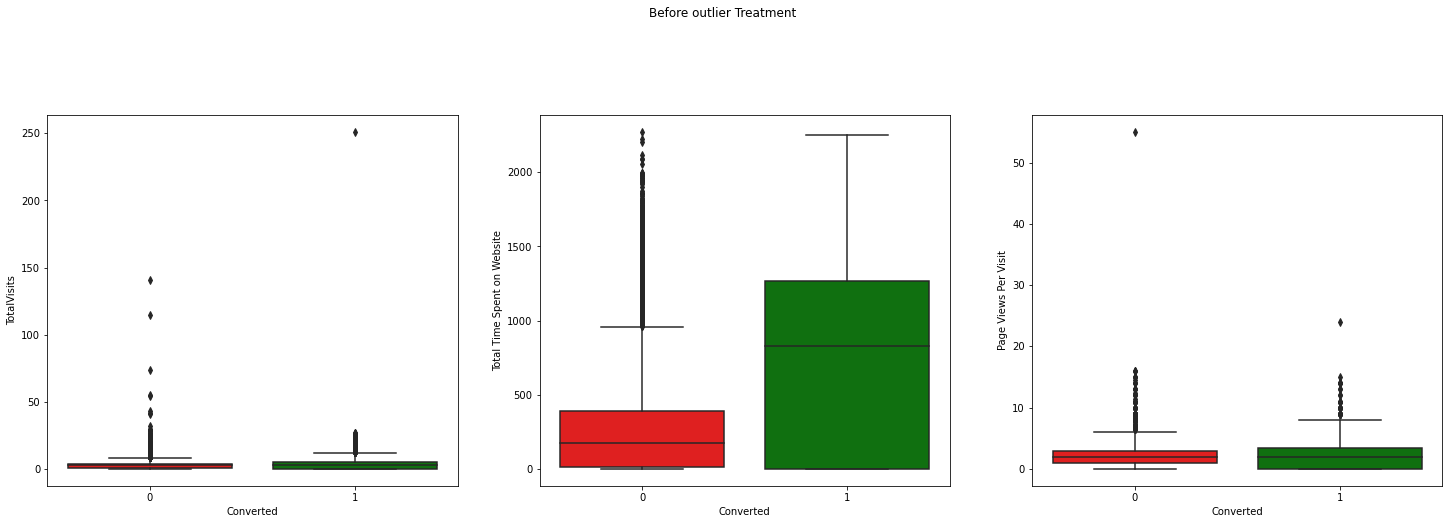

In [32]:
plt.figure(figsize=(25, 15))
plt.suptitle("Before outlier Treatment")
plt.subplot(2,3,1)
sns.boxplot(y=leads_df['TotalVisits'],x=leads_df['Converted'],palette = ["r","g"])
plt.subplot(2,3,2)
sns.boxplot(y=leads_df['Total Time Spent on Website'],x=leads_df['Converted'],palette = ["r","g"])
plt.subplot(2,3,3)
sns.boxplot(y=leads_df['Page Views Per Visit'],x=leads_df['Converted'],palette = ["r","g"])
plt.show()

From the above boxplots, clearly in TotalVisits, Total Time Spent on Website, and Page Views Per Visit outliers can be seen, let's treat them.

##### Treatment of Outliers

In [33]:
# Defining the interquantile range as values between 95 th percentile and 1st percentile , to prevent loss of data.
Q1 = leads_df.quantile(0.01) # taking 1st percentile lower fence
Q3 = leads_df.quantile(0.95) # taking 95th percentile upper fence
IQR = Q3 - Q1
print(IQR)

Lead Number                    75030.72
Converted                          1.00
TotalVisits                       10.00
Total Time Spent on Website     1557.00
Page Views Per Visit               6.00
dtype: float64


In [34]:
# Removing the extreme points which are below 0.01 percentile and above 0.99 percentile

leads_df=leads_df[~((leads_df < (Q1 - 1.5 * IQR)) |(leads_df > (Q3 + 1.5 * IQR))).any(axis=1)]

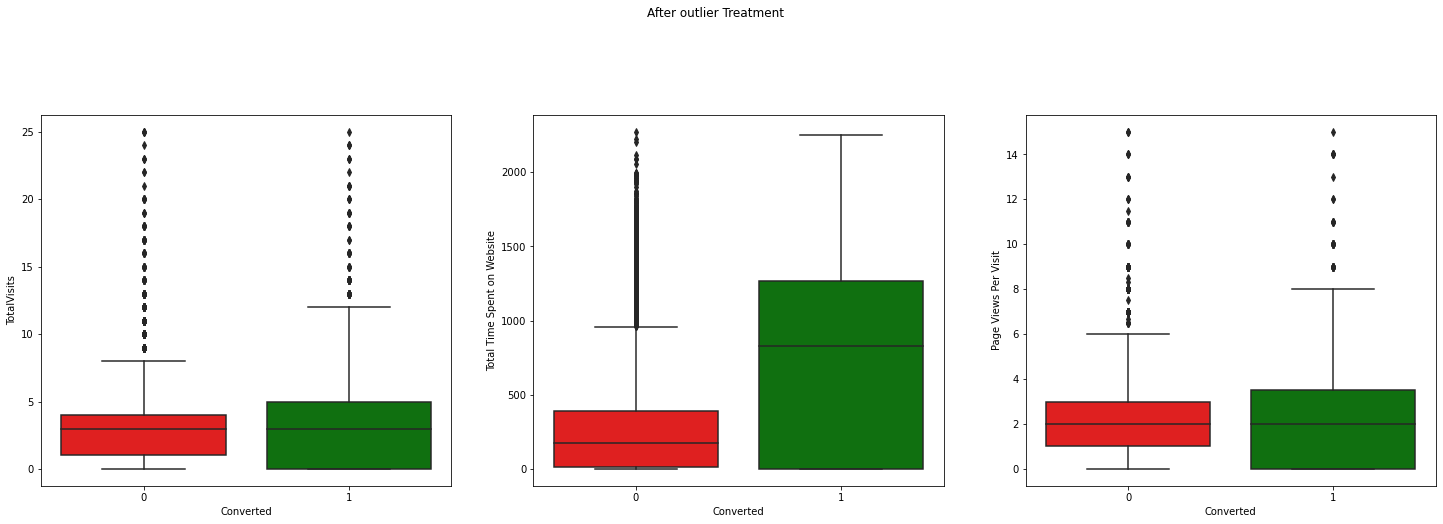

In [35]:
# Again checking the status of the outliers

plt.figure(figsize=(25, 15))
plt.suptitle("After outlier Treatment")
plt.subplot(2,3,1)
sns.boxplot(y=leads_df['TotalVisits'],x=leads_df['Converted'],palette = ["r","g"])
plt.subplot(2,3,2)
sns.boxplot(y=leads_df['Total Time Spent on Website'],x=leads_df['Converted'],palette = ["r","g"])
plt.subplot(2,3,3)
sns.boxplot(y=leads_df['Page Views Per Visit'],x=leads_df['Converted'],palette = ["r","g"])
plt.show()

There are still some outliers present on these data , but lets not remove further as we might lose the information for the variable.Let us proceed with this data for further analysis.

In [36]:
leads_df.head(3) # Final cleaned dataset

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Tag:response after reading email
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,OTHERS,OTHERS,OTHERS,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,OTHERS,OTHERS,No,No,Modified,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,OTHERS,OTHERS,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,OTHERS,OTHERS,No,No,Email Opened,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,OTHERS,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened,Yes


# Visualizing the data for indentifying potential variables that influence the target variable

### Numerical vs Categorical

Let's now visualise our data using seaborn. We'll first make a "boxplot" of numerical variables present to visualise which variables has most influence **Target** `Converted`.

###### For analysis and visualization purposes lets map "Yes" and "No" for the new target column from Converted column

In [37]:
#leads_df['Converted'].dtypes

leads_df['Target']=leads_df['Converted'].apply(lambda x:'Yes' if x==1 else 'No')
leads_df['Target'].value_counts()

No     5620
Yes    3428
Name: Target, dtype: int64

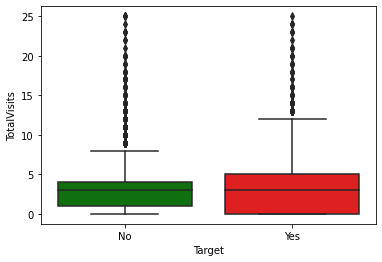

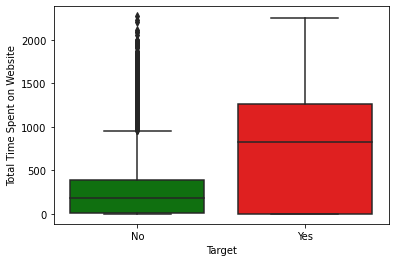

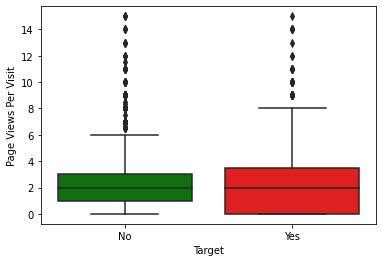

In [38]:
Numerical_Categorical=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for var in Numerical_Categorical:
    sns.boxplot(y=leads_df[var],x=leads_df['Target'],palette = ["g","r"])
    plt.show()


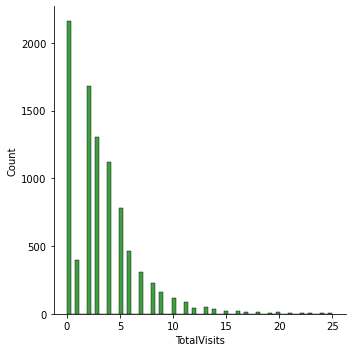

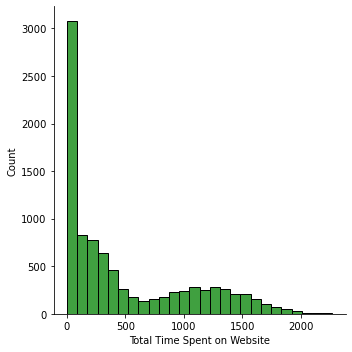

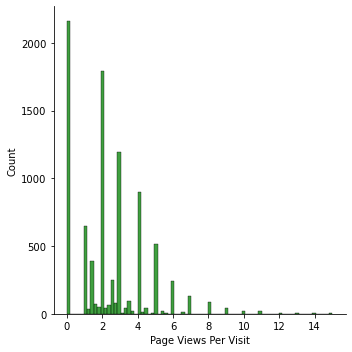

In [39]:
Numerical_Categorical=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for var in Numerical_Categorical:
    sns.displot(x=leads_df[var], color='green')
    plt.show()


Looking at the plots , even after removing outliers, there are significant number of outliers still present in the numerical data. 
* Taking a look at the median values total visits and page views per visit does not have much impact on the target variable "Converted" 
* However considering median value of  "Total time spent on webisite"  has influence, more time leads spend on the website they tend to get converted more.

### Checking for imbalance in Data

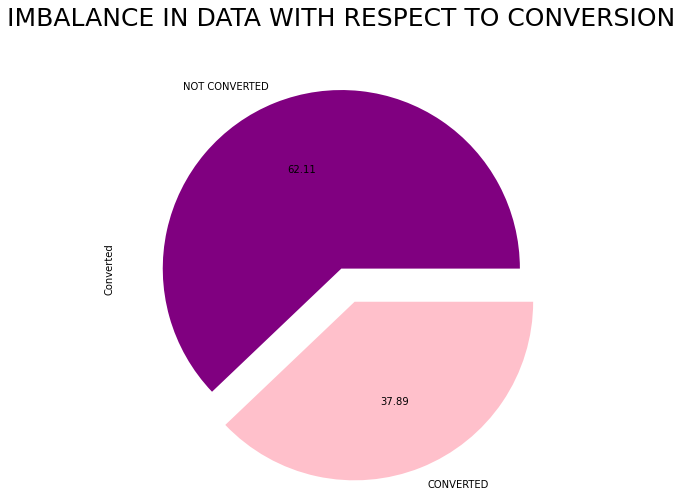

In [40]:
plt.figure(figsize= [8,10])
labels = ['NOT CONVERTED','CONVERTED']
leads_df['Converted'].value_counts().plot.pie(labels=labels,autopct='%.2f',colors=['purple','pink','lavender'],explode=[0,0.2])
plt.title("IMBALANCE IN DATA WITH RESPECT TO CONVERSION", fontdict = {"fontsize":25}, pad = 20)
plt.show()

### Imbalance in the data.

There can be seen a imbalance in the data with respect to conversion rate.More than 60% of data is of not converted.The steps to follow for analysing and interpreting the results.

* Accuracy should not be the only measure for evaluating the model.
* sensititvity-specificity balance should be maintained.
* According to business needs , we have to maintain precision - recall tradeoffs

### Categorical vs Categorical visualization

In [41]:
categorical_binary_var=['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
'Digital Advertisement',
'Through Recommendations',
'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
'A free copy of Mastering The Interview','Tag:response after reading email']
leads_df[categorical_binary_var].head(5)

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Tag:response after reading email
0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes
3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes


In [42]:
categorical_multilevel_var=['Lead Origin', 'Lead Source','Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course','Lead Profile', 'City','Last Notable Activity']
leads_df[categorical_multilevel_var].head(5)                    


,Lead Origin,Lead Source,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,OTHERS,OTHERS,OTHERS,Unemployed,Better Career Prospects,OTHERS,OTHERS,Modified
1,API,Organic Search,Email Opened,India,OTHERS,OTHERS,Unemployed,Better Career Prospects,OTHERS,OTHERS,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,India,Business Administration,OTHERS,Student,Better Career Prospects,Potential Lead,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,OTHERS,Mumbai,Modified
4,Landing Page Submission,Google,Converted to Lead,India,OTHERS,Other,Unemployed,Better Career Prospects,OTHERS,Mumbai,Modified


In [43]:

leads_df.select_dtypes(include=['object']).columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Tag:response after reading email', 'Target'],
      dtype='object')

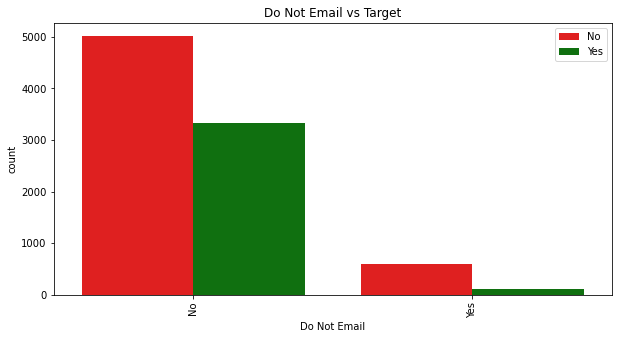

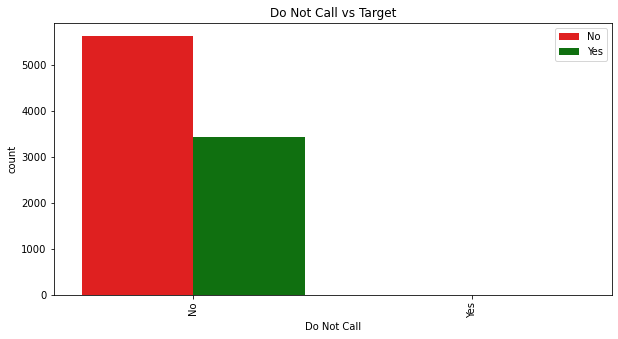

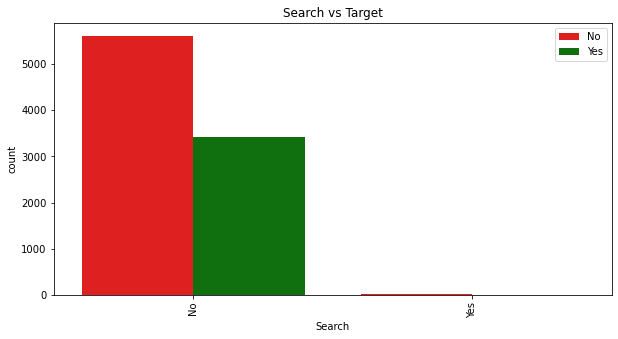

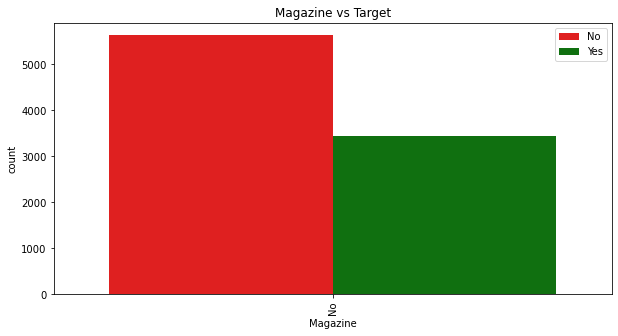

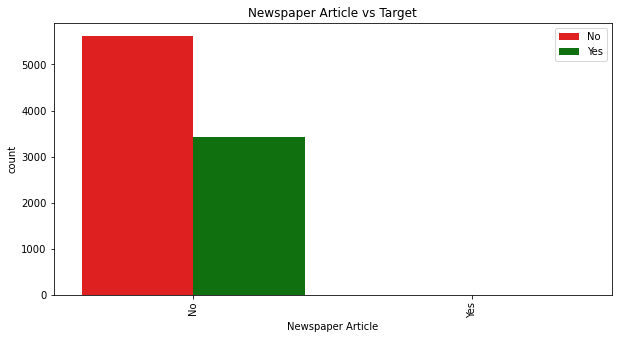

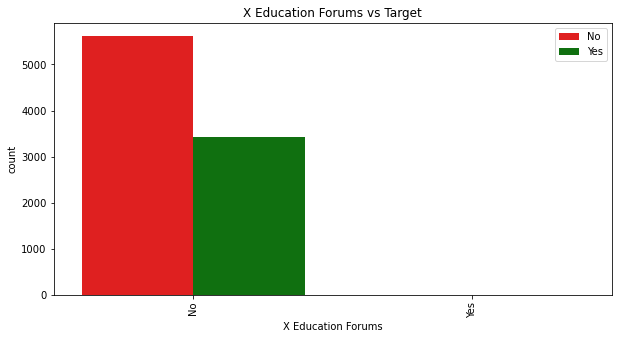

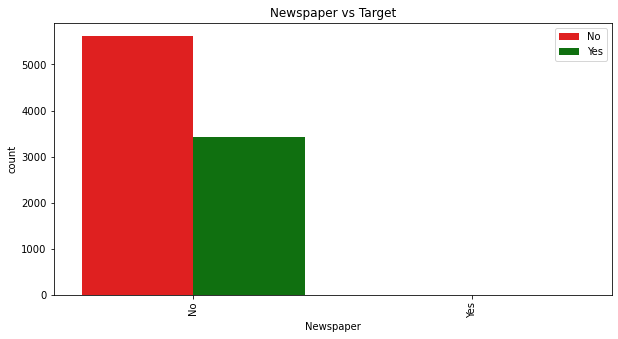

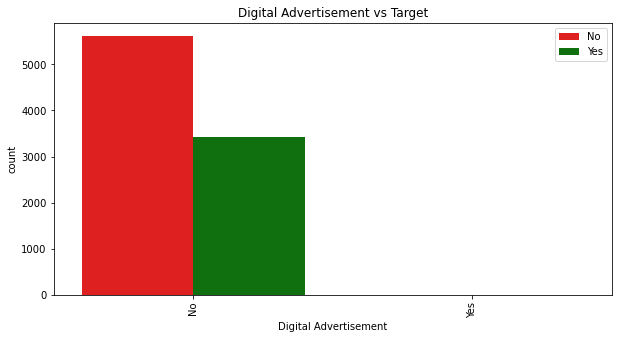

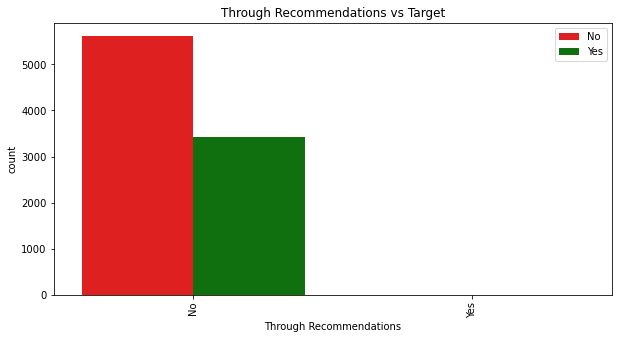

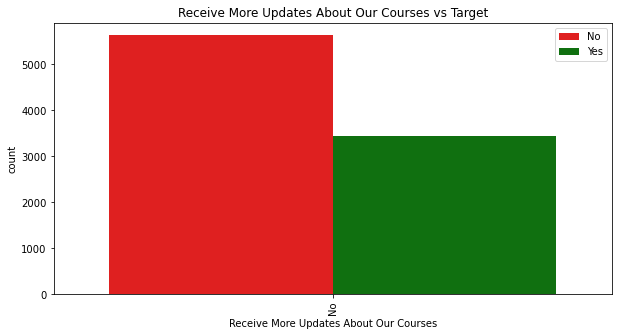

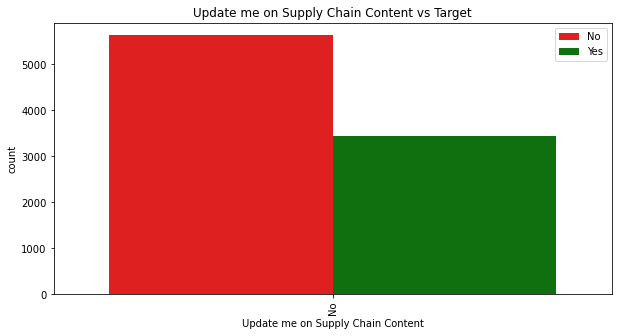

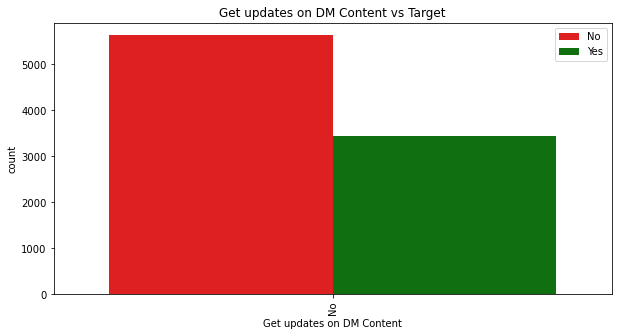

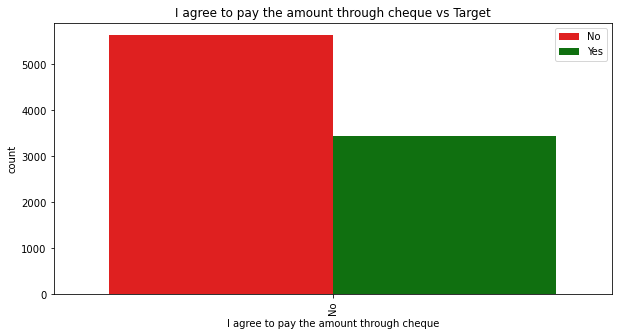

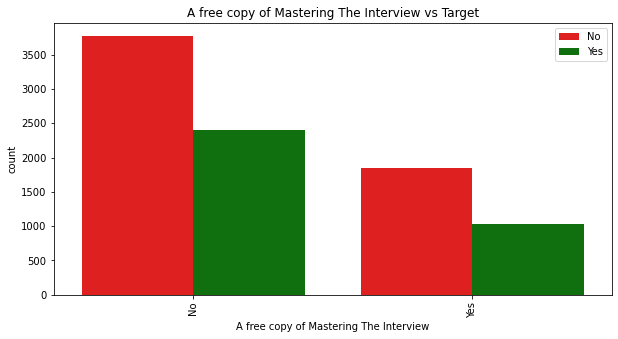

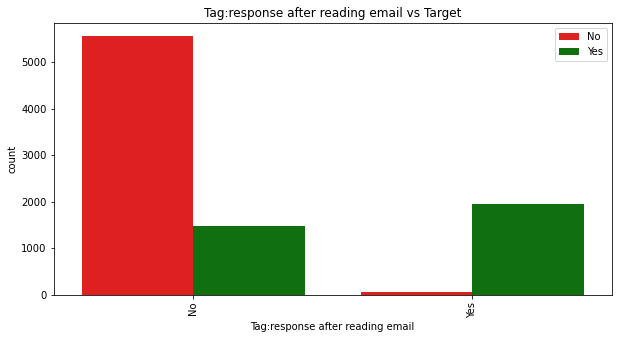

In [44]:
for i in range(len(categorical_binary_var)):
    #plt.subplot(13,2,i+1)
    plt.figure(figsize=[10,5])
    s1=sns.countplot(leads_df[categorical_binary_var[i]], hue=leads_df.Target,palette=['red','green'])
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s1.set_title("{0} vs Target".format(categorical_binary_var[i]))
    plt.legend(loc='upper right')
    plt.show()

All the above variables have very insignificant influece on the target variable except the derived variable **"Tag: response after reading email"** out of all the responses people who gave response as " yes" has been successfully converted.

* There are minimal responses of yes for variables 'Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Tag:response after reading email'out of which the converion rates are almost 0 percent.

* There are no response for yes for variables 'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'.There is nill influence of these variables with conversion rates.

* out of all binary response variables only the **"Tag: response after reading email"** has influence on conversion.

##### Visulizing Categorical Multivariate Variables 

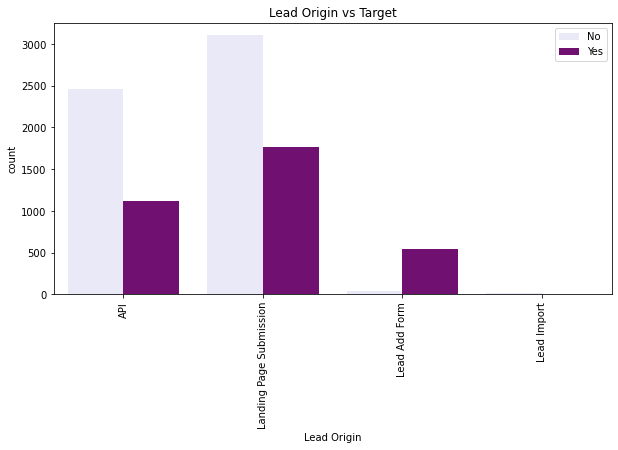

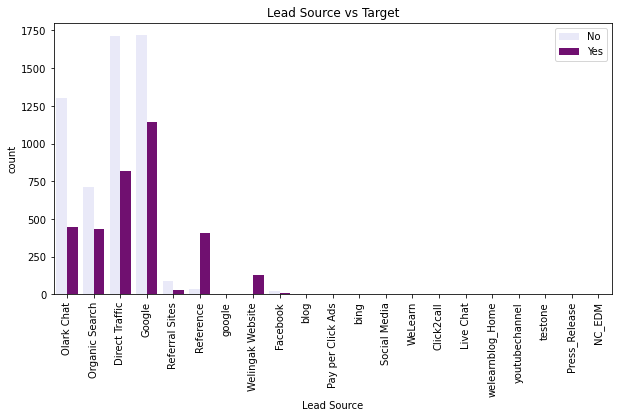

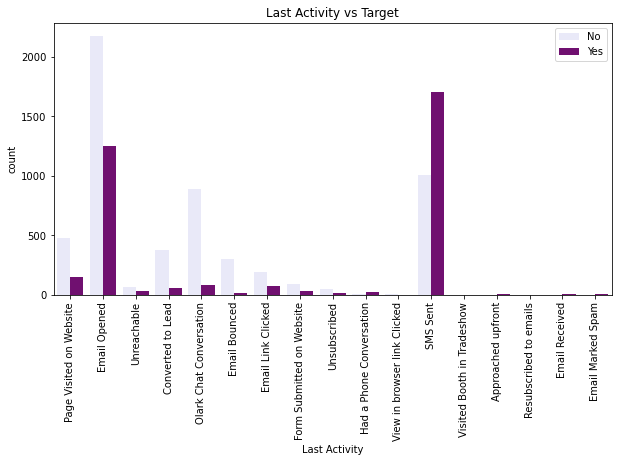

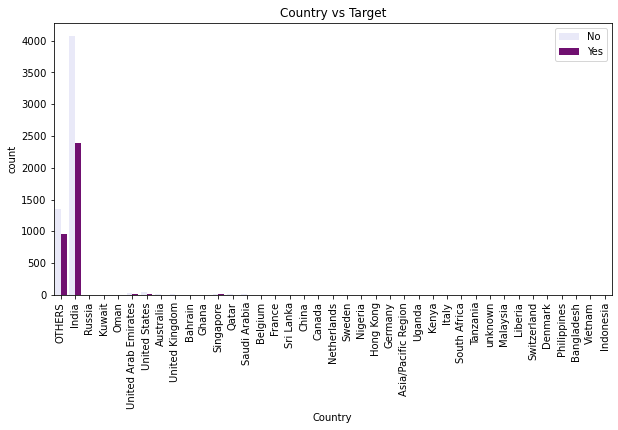

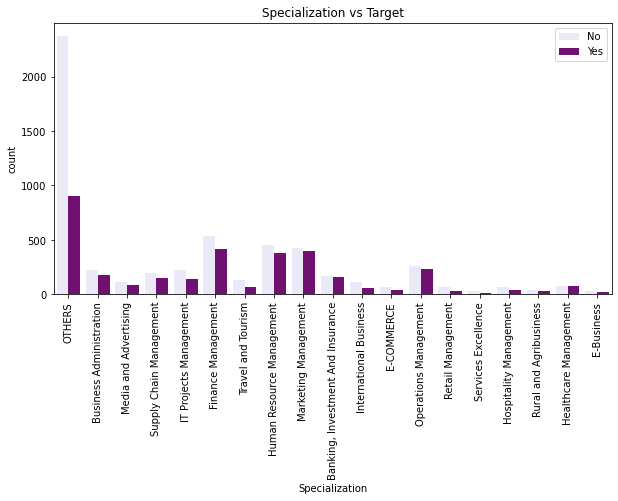

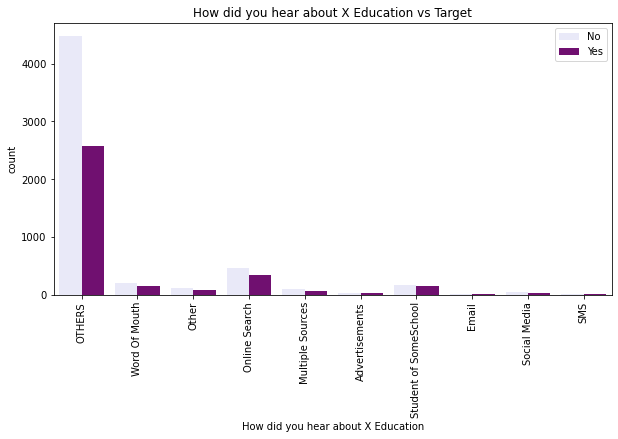

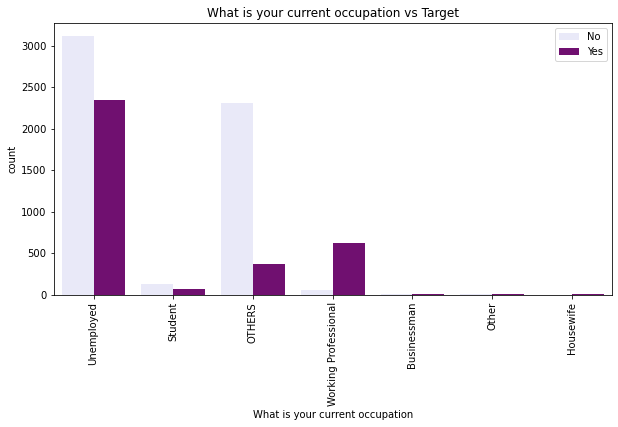

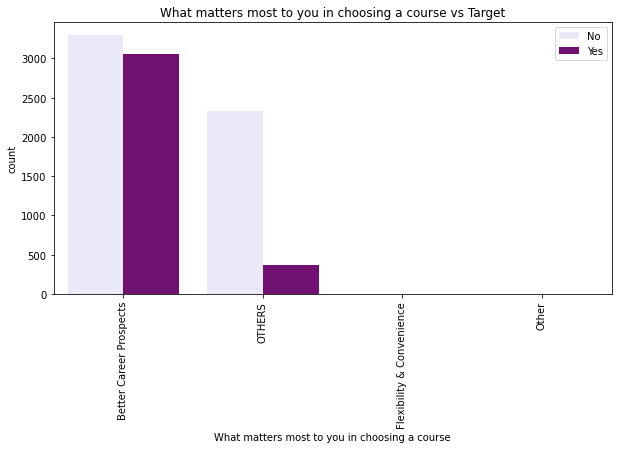

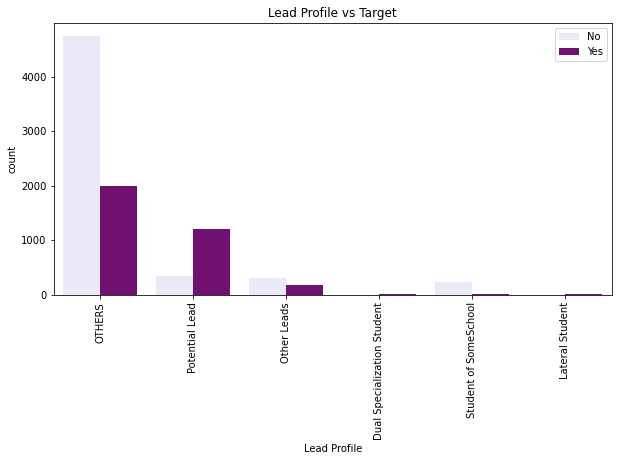

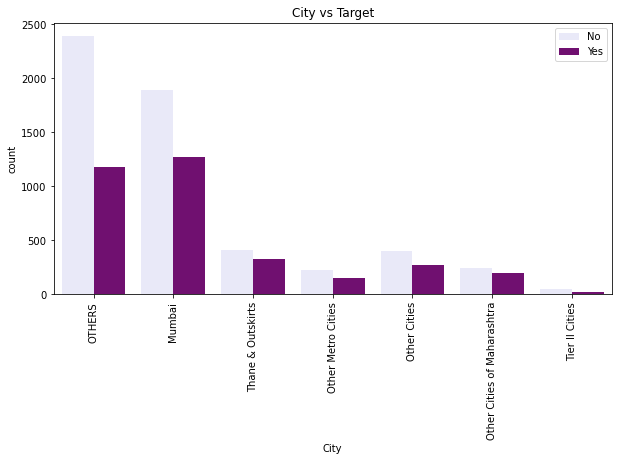

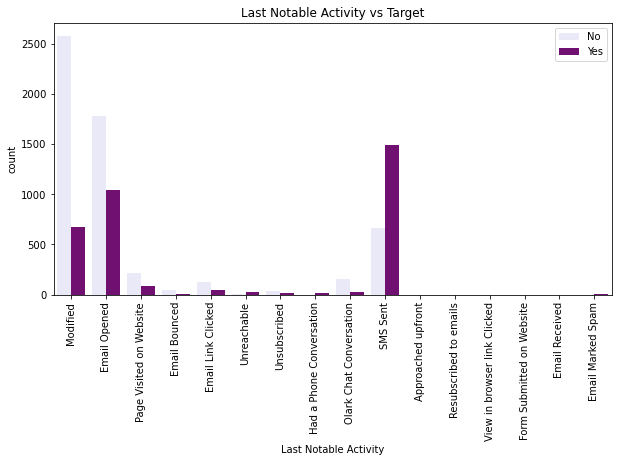

In [45]:
for i in range(len(categorical_multilevel_var)):
    #plt.subplot(13,2,i+1)
    plt.figure(figsize=[10,5])
    s1=sns.countplot(leads_df[categorical_multilevel_var[i]], hue=leads_df.Target,palette=['lavender','purple'])
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s1.set_title("{0} vs Target".format(categorical_multilevel_var[i]))
    plt.legend(loc='upper right')
    plt.show()

* Out of all Lead origin , "lead add form " has greater influence for successful conversion.while rest of 3 levels has "no" for conversion higher than "yes".

* lead sources such as reference, wellingak website  has more sucessful conversion compared to othe sources like, google,direct traffic,olark chat,organic search, referral sites.

* if the last activity of a potential lead is "Sms sent" there are lot of chances he gets converted,while "email opened" is still has potential.Other activities has more failures than successful conversion.

* Most of the leads are identified as indians , out of which many are not converted compared to success.

* looking at the specilization variable , all specializations has equal chances of getting successfully converted or not.

* "How did you hear about X education " outcome levels also doesnot have much influence on successful conversion.

* Working professionals has more successful conversion rates, while unemployed are potential leads , since their conversion rates are little higher compared to other "current occupation".

* People who look out for "better career prospects" tend to get converted more than others.

* when the lead profile is marked as " potential lead" ,there is higher successful conversion.

* City is not a variable that has influence on conversion

* if the last notable activity is " sms sent" there are higher chances, the leads get converted.However the levels are similar to last activity variable.there are chances "last notable activity" is highly correlated with last notable activity

# Multivariate Analysis on the variables with the target variable

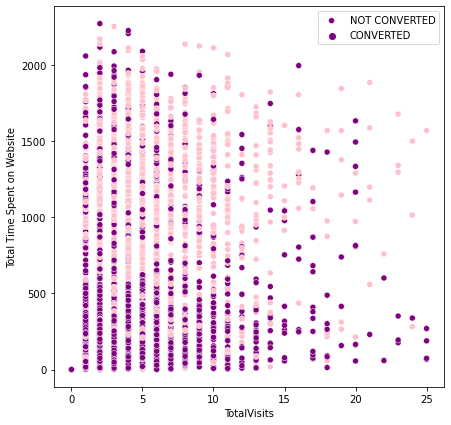

In [46]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=leads_df['TotalVisits'],y=leads_df['Total Time Spent on Website'],hue=leads_df['Target'],palette=['purple','pink'])
plt.legend(['NOT CONVERTED','CONVERTED'])
plt.show()

There is no pattern or influence seen between the relationship of all 3 variables

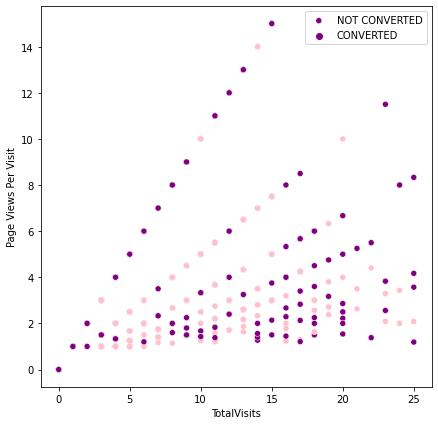

In [47]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=leads_df['TotalVisits'],y=leads_df['Page Views Per Visit'],hue=leads_df['Target'],palette=['purple','pink'])
plt.legend(['NOT CONVERTED','CONVERTED'])
plt.show()

There is some pattern visible , but there is no linear relationship between the variables, but there is a relationship between total visits and
page views per visit.
* As total visits increase , we can see a decline in page views per visit.
* This may cause correlation effect in further analysis and we may need to handle it.

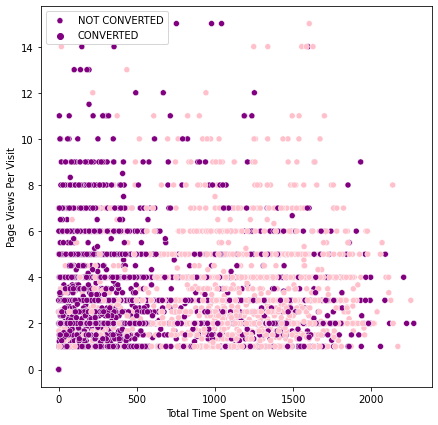

In [48]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=leads_df['Total Time Spent on Website'],y=leads_df['Page Views Per Visit'],hue=leads_df['Target'],palette=['purple','pink'])
plt.legend(['NOT CONVERTED','CONVERTED'])
plt.show()

There are no relationship or pattern detected between all 3 variables

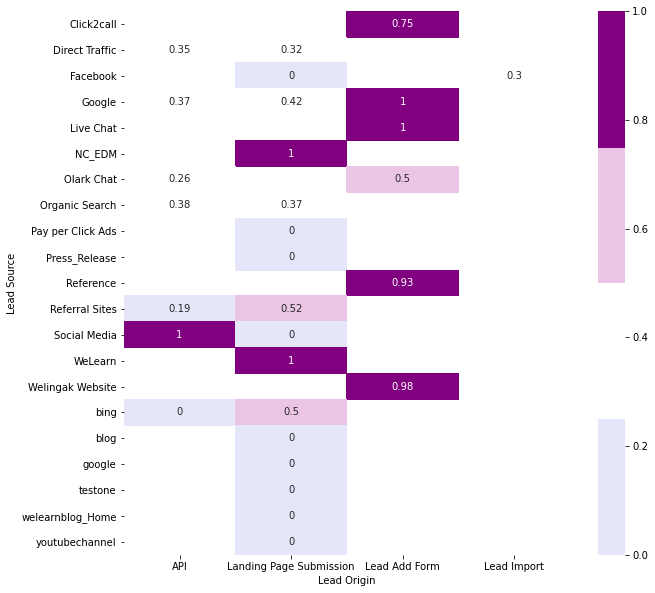

In [49]:
plt.figure(figsize=(10,10))
data=leads_df.pivot_table(columns='Lead Origin',index='Lead Source',values='Converted',aggfunc=np.mean)
sns.heatmap(data,annot=True,cmap=['lavender','white','#EBC5E5','purple'])
plt.show()

* The  Origin  from API ,with social media as source are "hot leads"
* The  Origin  from "landing page submission" ,with welearn as source should be targetted more
* The origin from lead add form through "welling ak","reference" as source has high chance of conversion

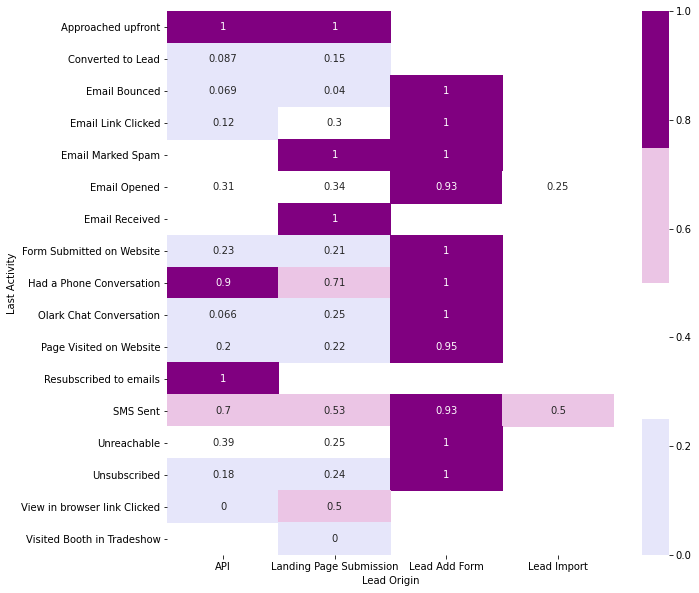

In [50]:
plt.figure(figsize=(10,10))
data=leads_df.pivot_table(columns='Lead Origin',index='Last Activity',values='Converted',aggfunc=np.mean)
sns.heatmap(data,annot=True,cmap=['lavender','white','#EBC5E5','purple'])
plt.show()

* Whatever the lead origin " when   approached upfront" , successful conversion occurs.
* Generally when the origin is lead add form whatever is the last activity, they turn out to be successful


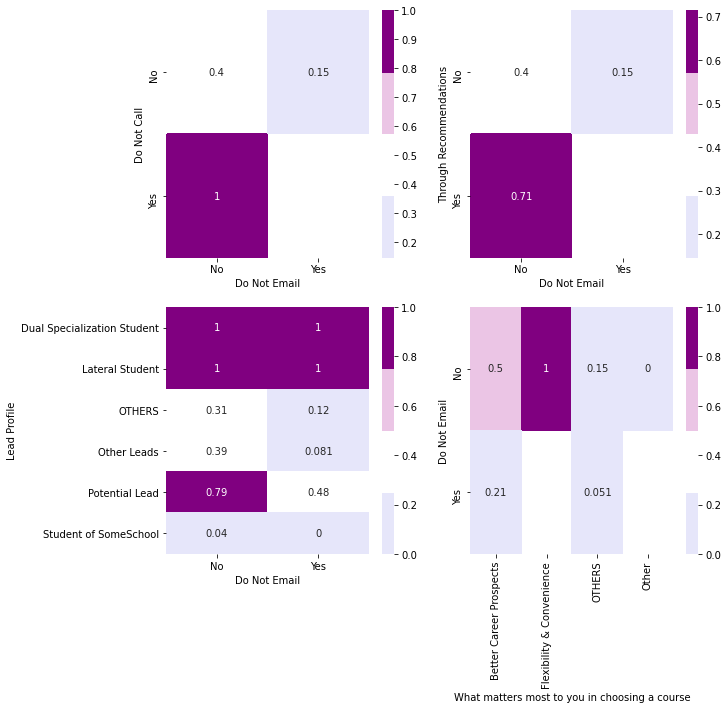

In [51]:

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
data=leads_df.pivot_table(columns='Do Not Email',index='Do Not Call',values='Converted',aggfunc=np.mean)
sns.heatmap(data,annot=True,cmap=['lavender','white','#EBC5E5','purple'])
plt.subplot(2,2,2)
data=leads_df.pivot_table(columns='Do Not Email',index='Through Recommendations',values='Converted',aggfunc=np.mean)
sns.heatmap(data,annot=True,cmap=['lavender','white','#EBC5E5','purple'])
plt.subplot(2,2,3)
data=leads_df.pivot_table(columns='Do Not Email',index='Lead Profile',values='Converted',aggfunc=np.mean)
sns.heatmap(data,annot=True,cmap=['lavender','white','#EBC5E5','purple'])
plt.subplot(2,2,4)
data=leads_df.pivot_table(columns='What matters most to you in choosing a course',index='Do Not Email',values='Converted',aggfunc=np.mean)
sns.heatmap(data,annot=True,cmap=['lavender','white','#EBC5E5','purple'])
plt.show()

* when the potential lead is ok with phone call and not ok with email, the success rate is high.
* Conversions through recommendation do not prefer to be emailed.
* whatever the lead profile , they dont like to be emailed about course.
* Conversions that prefered flexibility and convenience within the program also does not like to be emailed.

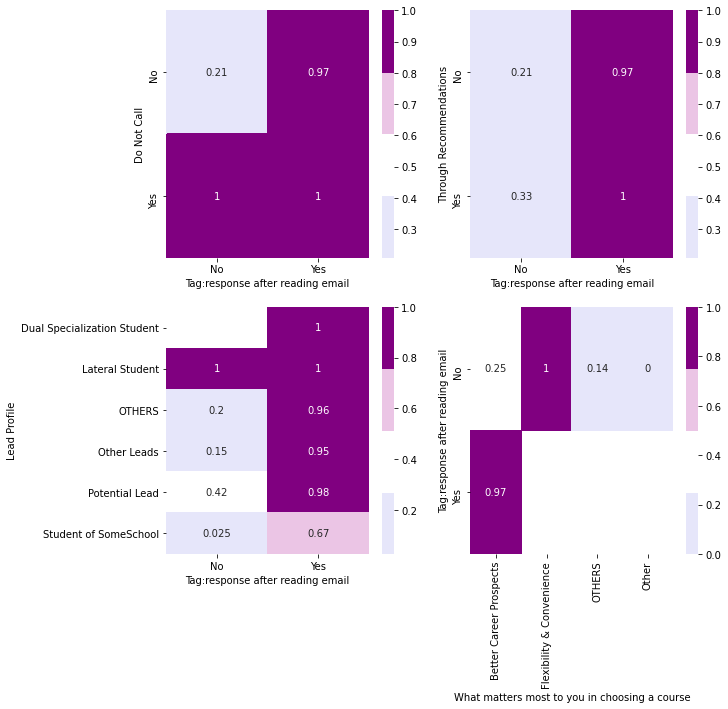

In [52]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
data=leads_df.pivot_table(columns='Tag:response after reading email',index='Do Not Call',values='Converted',aggfunc=np.mean)
sns.heatmap(data,annot=True,cmap=['lavender','white','#EBC5E5','purple'])
plt.subplot(2,2,2)
data=leads_df.pivot_table(columns='Tag:response after reading email',index='Through Recommendations',values='Converted',aggfunc=np.mean)
sns.heatmap(data,annot=True,cmap=['lavender','white','#EBC5E5','purple'])
plt.subplot(2,2,3)
data=leads_df.pivot_table(columns='Tag:response after reading email',index='Lead Profile',values='Converted',aggfunc=np.mean)
sns.heatmap(data,annot=True,cmap=['lavender','white','#EBC5E5','purple'])
plt.subplot(2,2,4)
data=leads_df.pivot_table(columns='What matters most to you in choosing a course',index='Tag:response after reading email',values='Converted',aggfunc=np.mean)
sns.heatmap(data,annot=True,cmap=['lavender','white','#EBC5E5','purple'])
plt.show()

* What ever the profile,call preference or recommendations, when the response tag is " will response after email", they are potential leads
* People who take course for better career prospects, when responds with " will response after email" tend to convert.
* people who prefer convinience and fexibility from course does not get tagged " will response after email".

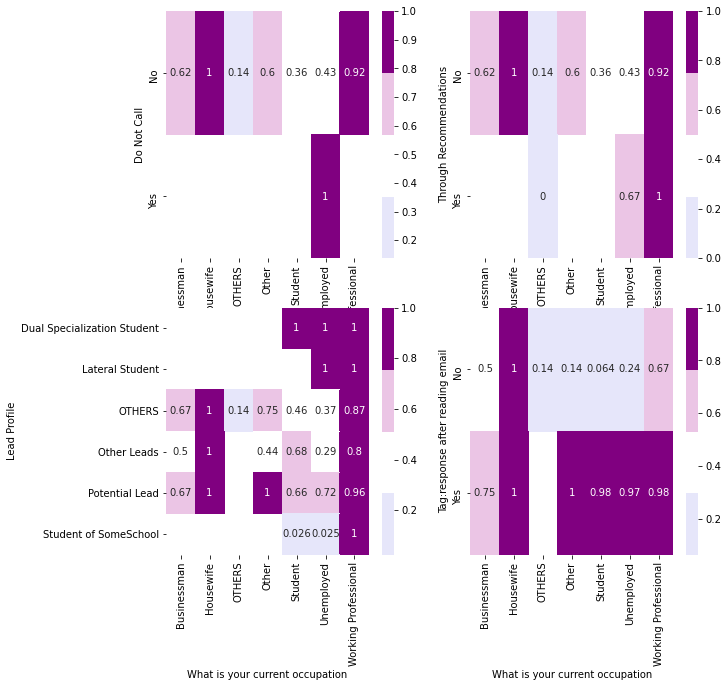

In [53]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
data=leads_df.pivot_table(columns='What is your current occupation',index='Do Not Call',values='Converted',aggfunc=np.mean)
sns.heatmap(data,annot=True,cmap=['lavender','white','#EBC5E5','purple'])
plt.subplot(2,2,2)
data=leads_df.pivot_table(columns='What is your current occupation',index='Through Recommendations',values='Converted',aggfunc=np.mean)
sns.heatmap(data,annot=True,cmap=['lavender','white','#EBC5E5','purple'])
plt.subplot(2,2,3)
data=leads_df.pivot_table(columns='What is your current occupation',index='Lead Profile',values='Converted',aggfunc=np.mean)
sns.heatmap(data,annot=True,cmap=['lavender','white','#EBC5E5','purple'])
plt.subplot(2,2,4)
data=leads_df.pivot_table(columns='What is your current occupation',index='Tag:response after reading email',values='Converted',aggfunc=np.mean)
sns.heatmap(data,annot=True,cmap=['lavender','white','#EBC5E5','purple'])
plt.show()

* Generally working professionals as well unemployed what ever may be their profile , have chances to be converted.
* whatever the occupation is when their response " response after reading email" , they are hot leads. 

In [54]:
# Drop Target variable created from converted variable that is used for visualization purposes only.
leads_df.drop('Target',axis=1,inplace=True)
leads_df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Tag:response after reading email
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,OTHERS,OTHERS,OTHERS,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,OTHERS,OTHERS,No,No,Modified,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,OTHERS,OTHERS,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,OTHERS,OTHERS,No,No,Email Opened,No


##### These are some of the insights derived from doing bivariate, multivariate exploratory data analysis on the data.

## Tranforming the variables

Now let us go ahead and transform the variables for model building to build a model that predicts the conversion using various factors.

There are many catergorical variables in our dataset.Binary valued categorical variable("yes","No") and multilevel categorical variable.The steps for transforming these variables are,
* Before Transforming Binary response variables, drop the ones that does not have balanced response, or has imbalance in the response.
* Transform the binary variable from ("yes","no") to (1,0).
* multilevel categorical: Group some of the levels with less siginificant occurence  into same value inorder to avoid redundancy   in data while creating dummy variables
* create dummy variables for this tranformed multilevel categorical variables.
* Scale these variables for further analysis, use either normalization or standardization

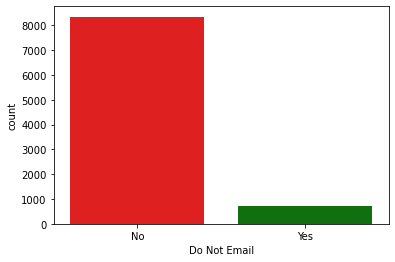

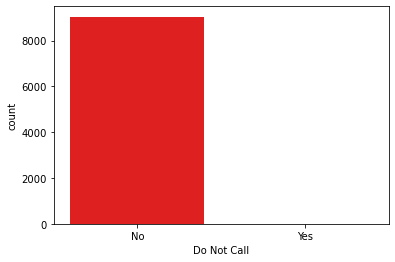

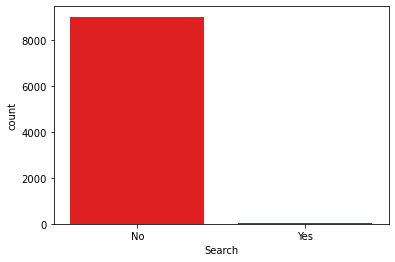

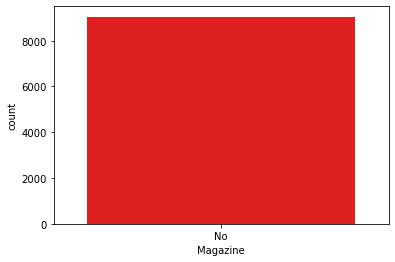

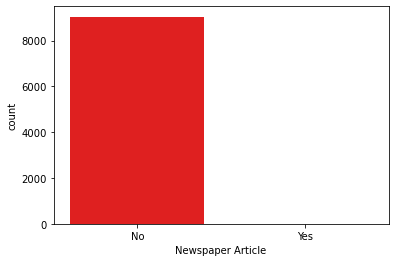

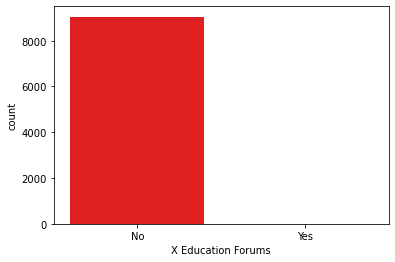

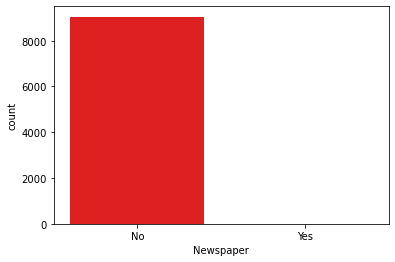

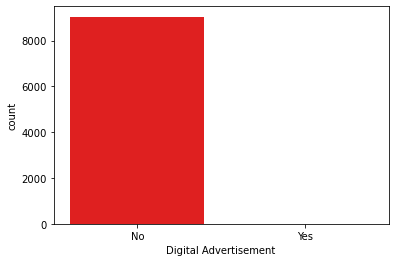

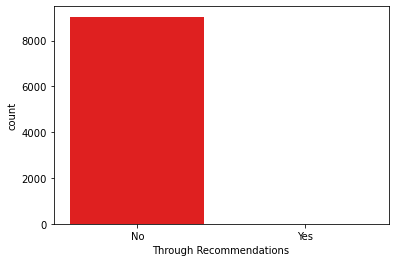

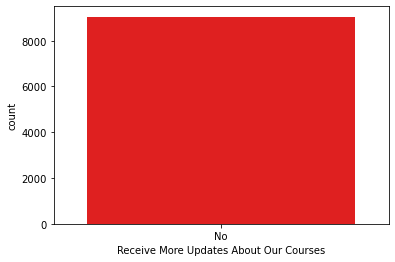

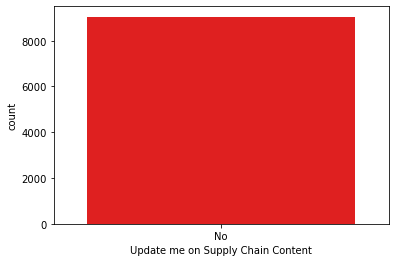

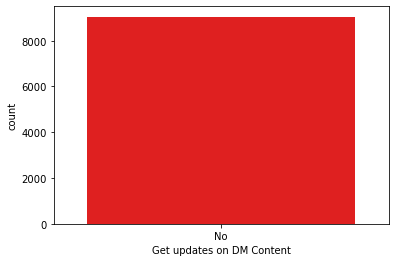

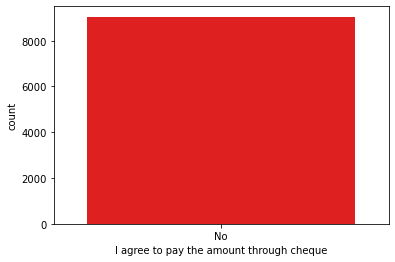

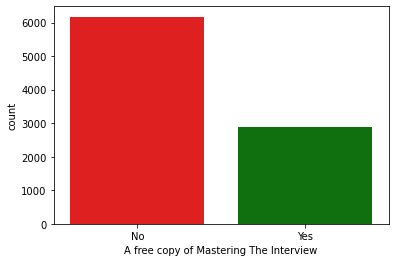

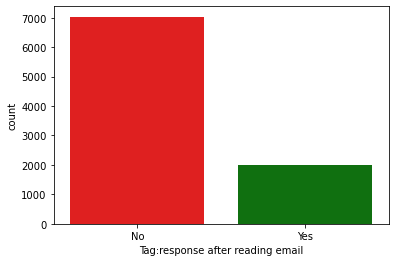

In [55]:
# Dropping the features that has imbalanced response
feature_list =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine','Newspaper Article', 
            'X Education Forums', 'Newspaper','Digital Advertisement', 
            'Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Tag:response after reading email']

for col in feature_list:
    sns.countplot(leads_df[col],palette=['red','green'])
    plt.show()

Taking a look at the responses for these variables, many of them doesnt have a recorded a response of yes at all  and any  analysis made with this on the target variable will not be valid. There is a huge imbalance for variables such as do not call,search,magazine,newspaper article,xeducation forums,newspaper,digitial advertisemnt,through recommendations,receive more,update about our courses,update me on supply chain content,get updates on dm content,i agree to pay amount thru check
They has zero responses recorded for yes, and we will not be able to analyse , what happens to converted variable if the response is "yes" for these variables, imputing these variables will also not be appropriate, so let us go ahead and drop these variables from our data.

In [56]:
feature_to_drop=['Do Not Call', 'Search', 'Magazine','Newspaper Article', 
            'X Education Forums', 'Newspaper','Digital Advertisement', 
            'Through Recommendations','Receive More Updates About Our Courses','Get updates on DM Content',
            'I agree to pay the amount through cheque','Update me on Supply Chain Content']
leads_df.drop(feature_to_drop,axis=1,inplace=True)

leads_df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Tag:response after reading email
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,OTHERS,OTHERS,OTHERS,Unemployed,Better Career Prospects,OTHERS,OTHERS,No,Modified,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,OTHERS,OTHERS,Unemployed,Better Career Prospects,OTHERS,OTHERS,No,Email Opened,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,OTHERS,Student,Better Career Prospects,Potential Lead,Mumbai,Yes,Email Opened,Yes


In [57]:
# Transform the binary variable from ("yes","no") to (1,0).

feature_list =  ['Do Not Email', 'A free copy of Mastering The Interview','Tag:response after reading email']

#### Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

#### Applying the function to the feature list
leads_df[feature_list] = leads_df[feature_list].apply(binary_map)
leads_df[feature_list].head(5)

,Do Not Email,A free copy of Mastering The Interview,Tag:response after reading email
0,0,0,0
1,0,0,0
2,0,1,1
3,0,0,0
4,0,0,1


In [58]:
# Multilevel categorical: Group some of the levels with less siginificant occurence into same value.
categorical_multilevel_var


['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Lead Profile',
 'City',
 'Last Notable Activity']

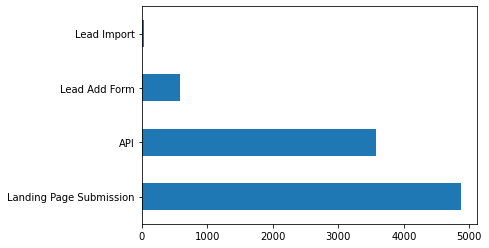

In [59]:
# Lead Origin
leads_df['Lead Origin'].value_counts().plot.barh()
plt.show()

No grouping is required for this variable, since all variables are having significant amount of information . let us go ahead and create dummy n-1 variables for n levels (here 3 var for 4 levels .
##### **NOTE :**
For the creation of dummy variables for levels in a categorical variable , if there are N levels in a variable , it is suffice to create n-1 levels thus avoiding redundancy in the data.

Here,
`000 - represents -API`

In [60]:
# create dummy for lead origin and drop the variable from original dataframe

lead_origin = pd.get_dummies(leads_df['Lead Origin'], drop_first = True) 
lead_origin.head(5)


,Landing Page Submission,Lead Add Form,Lead Import
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [61]:
leads_df = pd.concat([leads_df, lead_origin], axis = 1)

In [62]:
leads_df.drop('Lead Origin',axis=1,inplace=True)
leads_df.head(2)

,Prospect ID,Lead Number,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Tag:response after reading email,Landing Page Submission,Lead Add Form,Lead Import
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,OTHERS,OTHERS,OTHERS,Unemployed,Better Career Prospects,OTHERS,OTHERS,0,Modified,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,Organic Search,0,0,5.0,674,2.5,Email Opened,India,OTHERS,OTHERS,Unemployed,Better Career Prospects,OTHERS,OTHERS,0,Email Opened,0,0,0,0


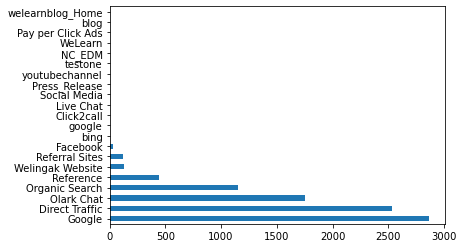

In [63]:
# Lead Source
leads_df['Lead Source'].value_counts().plot.barh()
plt.show()


In [64]:
# let us group everything except  google to reference into variable 'Other Sources'
leads_df['Lead Source']=leads_df['Lead Source'].replace(['Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'google',
       'Click2call', 'Press_Release', 'Social Media', 'Live Chat', 'testone',
       'blog', 'WeLearn', 'welearnblog_Home', 'NC_EDM', 'youtubechannel',
       'Pay per Click Ads'],'Other Sources')
leads_df['Lead Source'].value_counts() 

Google            2862
Direct Traffic    2532
Olark Chat        1753
Organic Search    1149
Reference          442
Other Sources      310
Name: Lead Source, dtype: int64

In [65]:
# Go ahead and create dummy variables and drop the original variable
lead_Source = pd.get_dummies(leads_df['Lead Source'], drop_first = True) 
lead_Source.head(5)
leads_df = pd.concat([leads_df, lead_Source], axis = 1)
leads_df.drop('Lead Source',axis=1,inplace=True)
leads_df.head(2)

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Tag:response after reading email,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Other Sources,Reference
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,Page Visited on Website,OTHERS,OTHERS,OTHERS,Unemployed,Better Career Prospects,OTHERS,OTHERS,0,Modified,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,Email Opened,India,OTHERS,OTHERS,Unemployed,Better Career Prospects,OTHERS,OTHERS,0,Email Opened,0,0,0,0,0,0,1,0,0


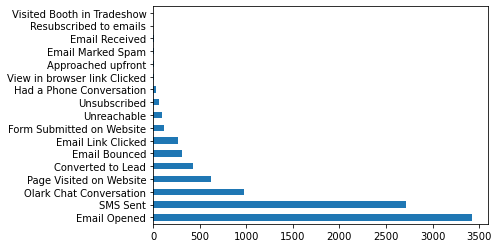

Index(['Email Opened', 'SMS Sent', 'Olark Chat Conversation',
       'Page Visited on Website', 'Converted to Lead', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'View in browser link Clicked', 'Approached upfront',
       'Email Marked Spam', 'Email Received', 'Resubscribed to emails',
       'Visited Booth in Tradeshow'],
      dtype='object')

In [66]:
#Last Activity
leads_df['Last Activity'].value_counts().plot.barh()
plt.show()
leads_df['Last Activity'].value_counts().index 

In [67]:
leads_df['Last Activity']=leads_df['Last Activity'].replace(['Page Visited on Website', 'Converted to Lead', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'View in browser link Clicked', 'Approached upfront',
       'Email Marked Spam', 'Email Received', 'Visited Booth in Tradeshow',
       'Resubscribed to emails'],'Other Activity')
leads_df['Last Activity'].value_counts() 

Email Opened               3426
SMS Sent                   2713
Other Activity             1938
Olark Chat Conversation     971
Name: Last Activity, dtype: int64

In [68]:
# Go ahead and create dummy variables and drop the original variable
lead_Activity = pd.get_dummies(leads_df['Last Activity'],prefix='lstacv',drop_first = True) 
lead_Activity.head(5)
leads_df = pd.concat([leads_df, lead_Activity], axis = 1)
leads_df.drop('Last Activity',axis=1,inplace=True)
leads_df.head(2)

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Tag:response after reading email,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Other Sources,Reference,lstacv_Olark Chat Conversation,lstacv_Other Activity,lstacv_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,OTHERS,OTHERS,OTHERS,Unemployed,Better Career Prospects,OTHERS,OTHERS,0,Modified,0,0,0,0,0,1,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,India,OTHERS,OTHERS,Unemployed,Better Career Prospects,OTHERS,OTHERS,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0


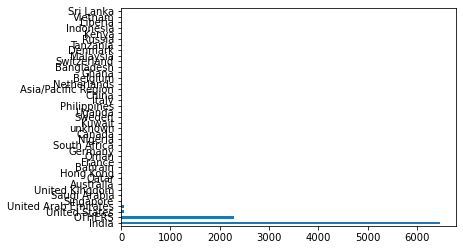

Index(['India', 'OTHERS', 'United States', 'United Arab Emirates', 'Singapore',
       'Saudi Arabia', 'United Kingdom', 'Australia', 'Qatar', 'Hong Kong',
       'Bahrain', 'France', 'Oman', 'Germany', 'South Africa', 'Nigeria',
       'Canada', 'unknown', 'Kuwait', 'Sweden', 'Uganda', 'Philippines',
       'Italy', 'China', 'Asia/Pacific Region', 'Netherlands', 'Belgium',
       'Ghana', 'Bangladesh', 'Switzerland', 'Malaysia', 'Denmark', 'Tanzania',
       'Russia', 'Kenya', 'Indonesia', 'Liberia', 'Vietnam', 'Sri Lanka'],
      dtype='object')

In [69]:
#Country
leads_df['Country'].value_counts().plot.barh()
plt.show()
leads_df['Country'].value_counts().index 

In [70]:
# Country
leads_df['Country']=leads_df['Country'].replace(['OTHERS', 'United States', 'United Arab Emirates', 'Singapore',
       'Saudi Arabia', 'United Kingdom', 'Australia', 'Qatar', 'Bahrain',
       'Hong Kong', 'Oman', 'France', 'South Africa', 'Kuwait', 'Nigeria',
       'Canada', 'Germany', 'unknown', 'Sweden', 'China', 'Bangladesh',
       'Uganda', 'Asia/Pacific Region', 'Belgium', 'Italy', 'Ghana',
       'Philippines', 'Netherlands', 'Liberia', 'Sri Lanka', 'Denmark',
       'Indonesia', 'Russia', 'Tanzania', 'Malaysia', 'Switzerland', 'Kenya',
       'Vietnam'],'Other Country')
leads_df['Country'].value_counts() 

India            6467
Other Country    2581
Name: Country, dtype: int64

In [71]:
leads_df['India']=leads_df['Country'].replace({'India':1,'Other Country':0})
leads_df.drop('Country',axis=1,inplace=True)
leads_df.head(3)

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Tag:response after reading email,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Other Sources,Reference,lstacv_Olark Chat Conversation,lstacv_Other Activity,lstacv_SMS Sent,India
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,OTHERS,OTHERS,Unemployed,Better Career Prospects,OTHERS,OTHERS,0,Modified,0,0,0,0,0,1,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,OTHERS,OTHERS,Unemployed,Better Career Prospects,OTHERS,OTHERS,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,Business Administration,OTHERS,Student,Better Career Prospects,Potential Lead,Mumbai,1,Email Opened,1,1,0,0,0,0,0,0,0,0,0,0,1


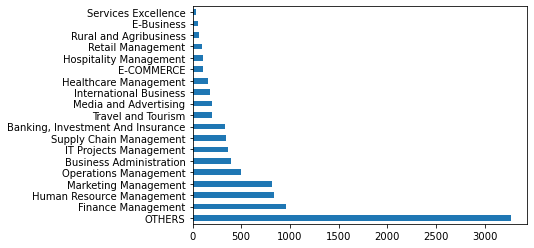

Index(['OTHERS', 'Finance Management', 'Human Resource Management',
       'Marketing Management', 'Operations Management',
       'Business Administration', 'IT Projects Management',
       'Supply Chain Management', 'Banking, Investment And Insurance',
       'Travel and Tourism', 'Media and Advertising', 'International Business',
       'Healthcare Management', 'E-COMMERCE', 'Hospitality Management',
       'Retail Management', 'Rural and Agribusiness', 'E-Business',
       'Services Excellence'],
      dtype='object')

In [72]:
#Specilization
leads_df['Specialization'].value_counts().plot.barh()
plt.show()
leads_df['Specialization'].value_counts().index 

In [73]:
leads_df['Specialization']=leads_df['Specialization'].replace(['OTHERS', 'Operations Management',
       'Business Administration', 'IT Projects Management',
       'Supply Chain Management', 'Banking, Investment And Insurance',
       'Travel and Tourism', 'Media and Advertising', 'International Business',
       'Healthcare Management', 'E-COMMERCE', 'Hospitality Management',
       'Retail Management', 'Rural and Agribusiness', 'E-Business',
       'Services Excellence'],'Other Specialization')
leads_df['Specialization'].value_counts() 

Other Specialization         6437
Finance Management            956
Human Resource Management     835
Marketing Management          820
Name: Specialization, dtype: int64

In [74]:
# Go ahead and create dummy variables and drop the original variable
Specialization = pd.get_dummies(leads_df['Specialization'], drop_first = True) 
Specialization.head(5)
leads_df = pd.concat([leads_df, Specialization], axis = 1)
leads_df.drop('Specialization',axis=1,inplace=True)
leads_df.head(2)

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Tag:response after reading email,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Other Sources,Reference,lstacv_Olark Chat Conversation,lstacv_Other Activity,lstacv_SMS Sent,India,Human Resource Management,Marketing Management,Other Specialization
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,OTHERS,Unemployed,Better Career Prospects,OTHERS,OTHERS,0,Modified,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,OTHERS,Unemployed,Better Career Prospects,OTHERS,OTHERS,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


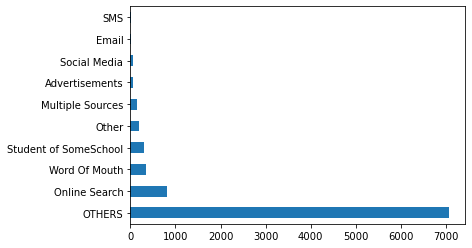

Index(['OTHERS', 'Online Search', 'Word Of Mouth', 'Student of SomeSchool',
       'Other', 'Multiple Sources', 'Advertisements', 'Social Media', 'Email',
       'SMS'],
      dtype='object')

In [75]:
#How did you hear about X Education
leads_df['How did you hear about X Education'].value_counts().plot.barh()
plt.show()
leads_df['How did you hear about X Education'].value_counts().index 

In [76]:
leads_df['How did you hear about X Education']=leads_df['How did you hear about X Education'].replace(['OTHERS', 'Student of SomeSchool',
       'Other', 'Multiple Sources', 'Advertisements', 'Social Media', 'Email',
       'SMS'],'Other medium')
leads_df['How did you hear about X Education'].value_counts() 

Other medium     7899
Online Search     802
Word Of Mouth     347
Name: How did you hear about X Education, dtype: int64

In [77]:
# Go ahead and create dummy variables and drop the original variable
Medium = pd.get_dummies(leads_df['How did you hear about X Education'], drop_first = True) 
Medium.head(5)
leads_df = pd.concat([leads_df, Medium], axis = 1)
leads_df.drop('How did you hear about X Education',axis=1,inplace=True)
leads_df.head(2)

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Tag:response after reading email,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Other Sources,Reference,lstacv_Olark Chat Conversation,lstacv_Other Activity,lstacv_SMS Sent,India,Human Resource Management,Marketing Management,Other Specialization,Other medium,Word Of Mouth
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,Unemployed,Better Career Prospects,OTHERS,OTHERS,0,Modified,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,Unemployed,Better Career Prospects,OTHERS,OTHERS,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


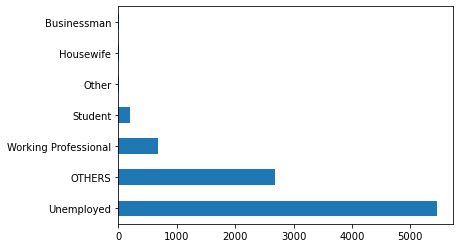

Index(['Unemployed', 'OTHERS', 'Working Professional', 'Student', 'Other',
       'Housewife', 'Businessman'],
      dtype='object')

In [78]:
#What is your current occupation
leads_df['What is your current occupation'].value_counts().plot.barh()
plt.show()
leads_df['What is your current occupation'].value_counts().index 

In [79]:
leads_df['What is your current occupation']=leads_df['What is your current occupation'].replace(['OTHERS', 'Other',
       'Housewife', 'Businessman'],'Other occupation')
leads_df['What is your current occupation'].value_counts() 

Unemployed              5458
Other occupation        2708
Working Professional     676
Student                  206
Name: What is your current occupation, dtype: int64

In [80]:
# Go ahead and create dummy variables and drop the original variable
occupation = pd.get_dummies(leads_df['What is your current occupation'], drop_first = True) 
occupation.head(5)
leads_df = pd.concat([leads_df, occupation], axis = 1)
leads_df.drop('What is your current occupation',axis=1,inplace=True)
leads_df.head(2)

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Tag:response after reading email,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Other Sources,Reference,lstacv_Olark Chat Conversation,lstacv_Other Activity,lstacv_SMS Sent,India,Human Resource Management,Marketing Management,Other Specialization,Other medium,Word Of Mouth,Student,Unemployed,Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,Better Career Prospects,OTHERS,OTHERS,0,Modified,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,Better Career Prospects,OTHERS,OTHERS,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0


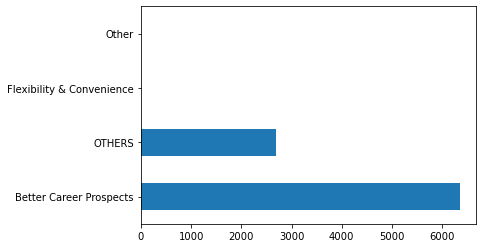

Index(['Better Career Prospects', 'OTHERS', 'Flexibility & Convenience',
       'Other'],
      dtype='object')

In [81]:
#What matters most to you in choosing a course
leads_df['What matters most to you in choosing a course'].value_counts().plot.barh()
plt.show()
leads_df['What matters most to you in choosing a course'].value_counts().index 

In [82]:
leads_df['What matters most to you in choosing a course']=leads_df['What matters most to you in choosing a course'].replace(['OTHERS', 'Other',
       'Flexibility & Convenience'],'Other reasons')
leads_df['What matters most to you in choosing a course'].value_counts() 

Better Career Prospects    6352
Other reasons              2696
Name: What matters most to you in choosing a course, dtype: int64

In [83]:
leads_df['Better Career Prospects']=leads_df['What matters most to you in choosing a course'].replace({'Better Career Prospects':1,'Other reasons':0})
leads_df.drop('What matters most to you in choosing a course',axis=1,inplace=True)
leads_df.head(3)

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Tag:response after reading email,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Other Sources,Reference,lstacv_Olark Chat Conversation,lstacv_Other Activity,lstacv_SMS Sent,India,Human Resource Management,Marketing Management,Other Specialization,Other medium,Word Of Mouth,Student,Unemployed,Working Professional,Better Career Prospects
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,OTHERS,OTHERS,0,Modified,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,OTHERS,OTHERS,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,Potential Lead,Mumbai,1,Email Opened,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1


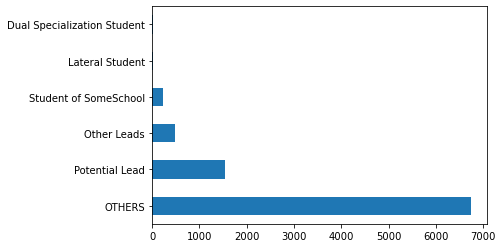

Index(['OTHERS', 'Potential Lead', 'Other Leads', 'Student of SomeSchool',
       'Lateral Student', 'Dual Specialization Student'],
      dtype='object')

In [84]:
#Lead Profile
leads_df['Lead Profile'].value_counts().plot.barh()
plt.show()
leads_df['Lead Profile'].value_counts().index 

In [85]:
leads_df['Lead Profile']=leads_df['Lead Profile'].replace(['OTHERS', 'Other Leads', 'Student of SomeSchool',
       'Lateral Student', 'Dual Specialization Student'],'Other profile')
leads_df['Lead Profile'].value_counts() 

Other profile     7499
Potential Lead    1549
Name: Lead Profile, dtype: int64

In [86]:
leads_df['Lead Profile']=leads_df['Lead Profile'].replace({'Potential Lead':1,'Other profile':0})
leads_df.drop('Lead Profile',axis=1,inplace=True)
leads_df.head(3)

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City,A free copy of Mastering The Interview,Last Notable Activity,Tag:response after reading email,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Other Sources,Reference,lstacv_Olark Chat Conversation,lstacv_Other Activity,lstacv_SMS Sent,India,Human Resource Management,Marketing Management,Other Specialization,Other medium,Word Of Mouth,Student,Unemployed,Working Professional,Better Career Prospects
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,OTHERS,0,Modified,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,OTHERS,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,Mumbai,1,Email Opened,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1


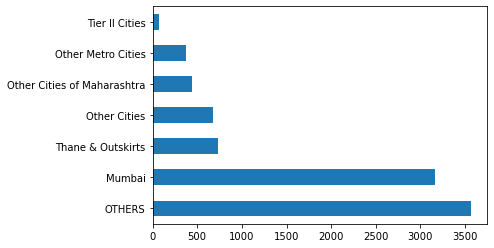

Index(['OTHERS', 'Mumbai', 'Thane & Outskirts', 'Other Cities',
       'Other Cities of Maharashtra', 'Other Metro Cities', 'Tier II Cities'],
      dtype='object')

In [87]:
#City
leads_df['City'].value_counts().plot.barh()
plt.show()
leads_df['City'].value_counts().index 

In [88]:
leads_df['City']=leads_df['City'].replace(['OTHERS', 'Other Cities',
       'Other Cities of Maharashtra', 'Other Metro Cities', 'Tier II Cities'],'Other Cities')
leads_df['City'].value_counts() 

Other Cities         5144
Mumbai               3166
Thane & Outskirts     738
Name: City, dtype: int64

In [89]:
# Go ahead and create dummy variables and drop the original variable
City = pd.get_dummies(leads_df['City'], drop_first = True) 
City.head(5)
leads_df = pd.concat([leads_df, City], axis = 1)
leads_df.drop('City',axis=1,inplace=True)
leads_df.head(2)

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity,Tag:response after reading email,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Other Sources,Reference,lstacv_Olark Chat Conversation,lstacv_Other Activity,lstacv_SMS Sent,India,Human Resource Management,Marketing Management,Other Specialization,Other medium,Word Of Mouth,Student,Unemployed,Working Professional,Better Career Prospects,Other Cities,Thane & Outskirts
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,Modified,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0


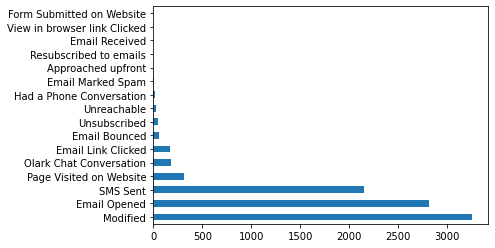

Index(['Modified', 'Email Opened', 'SMS Sent', 'Page Visited on Website',
       'Olark Chat Conversation', 'Email Link Clicked', 'Email Bounced',
       'Unsubscribed', 'Unreachable', 'Had a Phone Conversation',
       'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails',
       'Email Received', 'View in browser link Clicked',
       'Form Submitted on Website'],
      dtype='object')

In [90]:
#Last Notable Activity
leads_df['Last Notable Activity'].value_counts().plot.barh()
plt.show()
leads_df['Last Notable Activity'].value_counts().index 

In [91]:
leads_df['Last Notable Activity']=leads_df['Last Notable Activity'].replace(['Page Visited on Website',
       'Olark Chat Conversation', 'Email Link Clicked', 'Email Bounced',
       'Unsubscribed', 'Unreachable', 'Had a Phone Conversation',
       'Email Marked Spam', 'Approached upfront', 'Email Received',
       'Resubscribed to emails', 'Form Submitted on Website',
       'View in browser link Clicked'],'Other Notable activity')
leads_df['Last Notable Activity'].value_counts() 

Modified                  3258
Email Opened              2817
SMS Sent                  2150
Other Notable activity     823
Name: Last Notable Activity, dtype: int64

In [92]:
# Go ahead and create dummy variables and drop the original variable
Notable_Activity = pd.get_dummies(leads_df['Last Notable Activity'],prefix='lastnotable',drop_first = True) 
Notable_Activity.head(5)
leads_df = pd.concat([leads_df, Notable_Activity], axis = 1)
leads_df.drop('Last Notable Activity',axis=1,inplace=True)
leads_df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Tag:response after reading email,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Other Sources,Reference,lstacv_Olark Chat Conversation,lstacv_Other Activity,lstacv_SMS Sent,India,Human Resource Management,Marketing Management,Other Specialization,Other medium,Word Of Mouth,Student,Unemployed,Working Professional,Better Career Prospects,Other Cities,Thane & Outskirts,lastnotable_Modified,lastnotable_Other Notable activity,lastnotable_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0


In [93]:
leads_df.shape

(9048, 35)

#### After grouping and creating dummy variables for all the categorical variables now there are 9048 rows and 37 columns.Next step is to scale all variables, so that model is stable and interpretable. But, first let's do the Train-Test Split.

# Train -Test Split

In [94]:
# Putting feature variable to X
X = leads_df.drop(['Converted','Prospect ID','Lead Number'], axis=1)
X.head(2)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Tag:response after reading email,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Other Sources,Reference,lstacv_Olark Chat Conversation,lstacv_Other Activity,lstacv_SMS Sent,India,Human Resource Management,Marketing Management,Other Specialization,Other medium,Word Of Mouth,Student,Unemployed,Working Professional,Better Career Prospects,Other Cities,Thane & Outskirts,lastnotable_Modified,lastnotable_Other Notable activity,lastnotable_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,0


In [95]:
# Putting response variable to y

y = leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [96]:
# Splitting the data into train and test
np.random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [97]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Tag:response after reading email,Landing Page Submission,Lead Add Form,Lead Import,Google,Olark Chat,Organic Search,Other Sources,Reference,lstacv_Olark Chat Conversation,lstacv_Other Activity,lstacv_SMS Sent,India,Human Resource Management,Marketing Management,Other Specialization,Other medium,Word Of Mouth,Student,Unemployed,Working Professional,Better Career Prospects,Other Cities,Thane & Outskirts,lastnotable_Modified,lastnotable_Other Notable activity,lastnotable_SMS Sent
8425,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
8341,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
7376,0,-0.402157,-0.071940,-0.165214,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0
7414,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0
3521,0,0.517288,1.213416,1.305648,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1


In [98]:
### Checking the Conversion Rate

Conversion_Rate= (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Conversion_Rate

37.8868258178603

We have almost 38 % Conversion Rate

# Correlation Check 

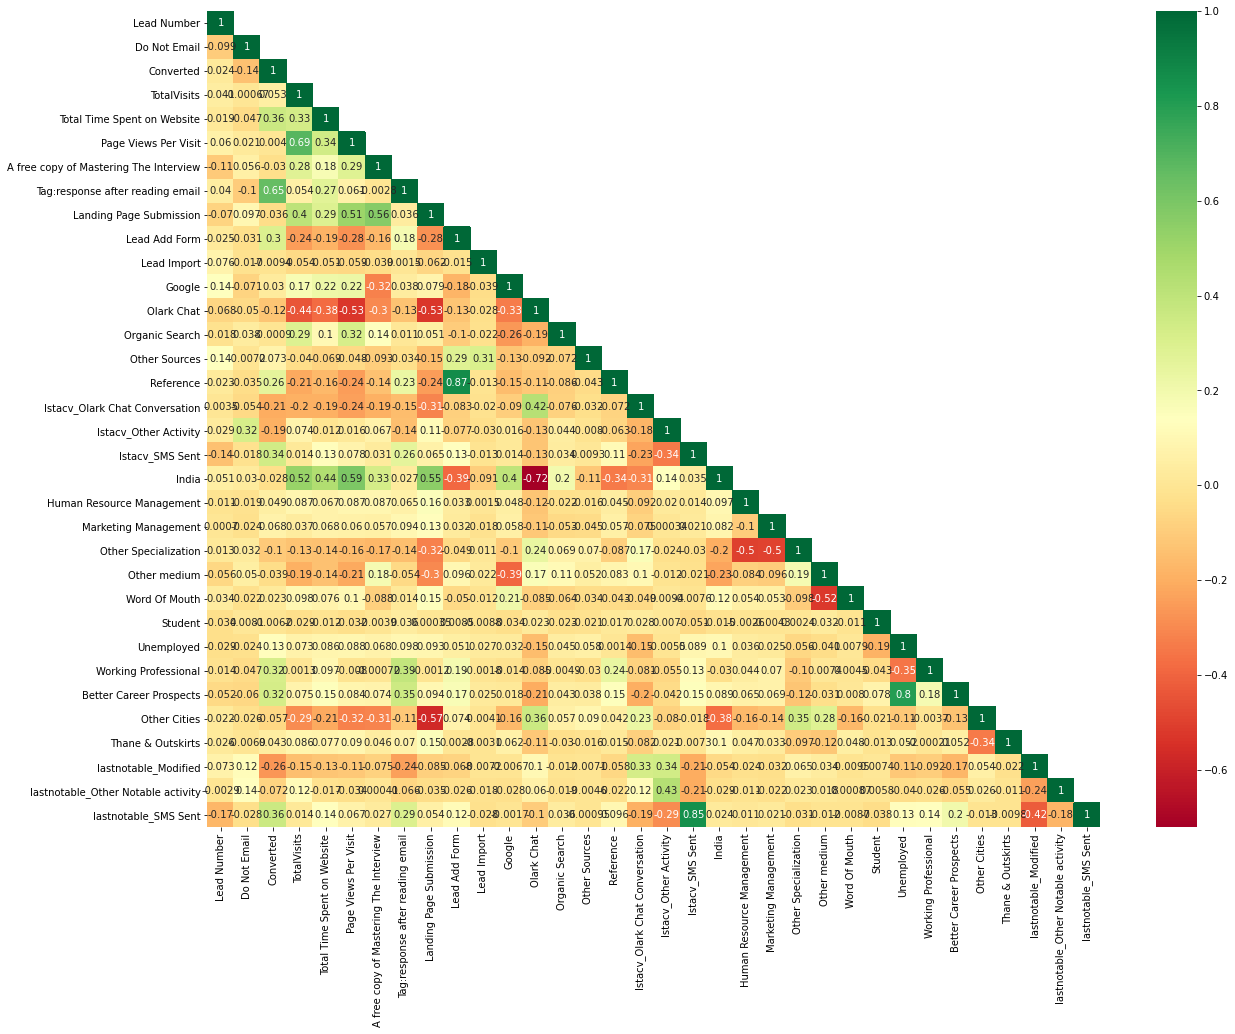

In [99]:
# Let's check the correlation first
plt.figure(figsize=[20,15])
corr_df=leads_df.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))

hmap=sns.heatmap(df_lt,cmap="RdYlGn",annot=True)
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)

In [100]:
# Let's check the correlation first

#plt.figure(figsize=[20,15])
#hmap=sns.heatmap(leads_df.corr(),annot=True)
#hmap.figure.savefig("Correlation_Heatmap_of_variables.png",
                    #format='png',
                    #dpi=150)
#plt.show()

#### Dropping highly correlated dummy variables

In [101]:
X_test = X_test.drop(['lastnotable_SMS Sent','Better Career Prospects', 'Lead Add Form'], 1)
X_train = X_train.drop(['lastnotable_SMS Sent','Better Career Prospects', 'Lead Add Form'], 1)

In [102]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Tag:response after reading email,Landing Page Submission,Lead Import,Google,Olark Chat,Organic Search,Other Sources,Reference,lstacv_Olark Chat Conversation,lstacv_Other Activity,lstacv_SMS Sent,India,Human Resource Management,Marketing Management,Other Specialization,Other medium,Word Of Mouth,Student,Unemployed,Working Professional,Other Cities,Thane & Outskirts,lastnotable_Modified,lastnotable_Other Notable activity
8425,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
8341,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
7376,0,-0.402157,-0.071940,-0.165214,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0
7414,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0
3521,0,0.517288,1.213416,1.305648,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0


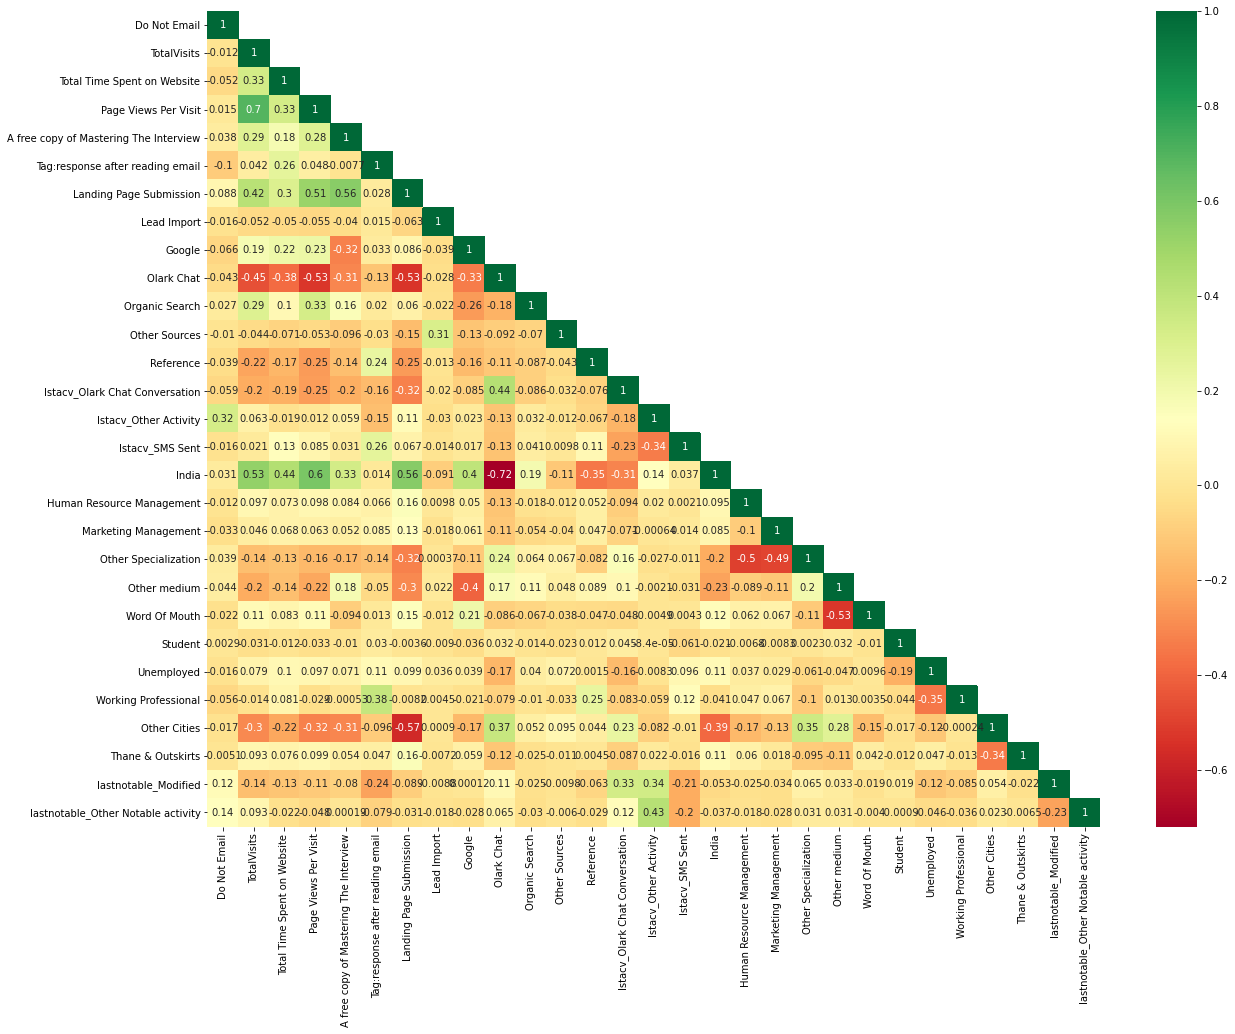

In [103]:
#plt.figure(figsize=[20,15])
#sns.heatmap(X_train.corr(),annot=True)
#plt.show()

plt.figure(figsize=[20,15])
corr_df=X_train.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))

hmap=sns.heatmap(df_lt,cmap="RdYlGn",annot=True)
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)

# Logistic Regression Model Building

##### MODEL 1

In [104]:
# using general linear model from stats model for building logreg model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1942.3
Date:                Tue, 12 Oct 2021   Deviance:                       3884.5
Time:                        10:25:14   Pearson chi2:                 6.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9279      0.347     -2.678      0.007      -1.607      -0.249
Do Not Email                              -0.9875      0.213     -4.636      0.000      -1.405      -0.570
TotalVisits                                0.3213      0.056      5.716      0.000       0.211       0.431
Total Time Spent on Website                1.0129      0.047     21.570      0.000       0.921       1.105
Page Views Per Visit                      -0.3515      0.066     -5.290      0.000      -0.482      -0.221
A free copy of Mastering The Interview     0.0631      0.134      0.470      0.638      -0.200       0.326
Tag:response after reading email           4.3964      0.179     24.547      0.000       4.045       4.747
Landing Page Submission                   -0.6100      0.153     -3.990      0.000      -0.910      -0.310
Lead Import                               -2.2671      0.719     -3.153      0.002      -3.676      -0.858
Google                                     0.2992      0.140      2.134      0.033       0.024       0.574
Olark Chat                                 0.5309      0.225      2.357      0.018       0.090       0.972
Organic Search                             0.1678      0.158      1.059      0.289      -0.143       0.478
Other Sources                              2.0722      0.240      8.630      0.000       1.602       2.543
Reference                                  2.4633      0.324      7.606      0.000       1.829       3.098
lstacv_Olark Chat Conversation            -1.4478      0.219     -6.607      0.000      -1.877      -1.018
lstacv_Other Activity                     -0.6733      0.174     -3.867      0.000      -1.015      -0.332
lstacv_SMS Sent                            1.1348      0.096     11.820      0.000       0.947       1.323
India                                     -0.8652      0.170     -5.082      0.000      -1.199      -0.532
Human Resource Management                 -0.1359      0.191     -0.711      0.477      -0.511       0.239
Marketing Management                      -0.0508      0.195     -0.260      0.795      -0.433       0.332
Other Specialization                      -0.2381      0.149     -1.595      0.111      -0.531       0.054
Other medium                               0.0880      0.173      0.510      0.610      -0.250       0.426
Word Of Mouth                              0.3710      0.241      1.539      0.124      -0.102       0.844
Student                                   -0.2567      0.351     -0.732      0.464      -0.944       0.431
Unemployed                                 0.4430      0.094      4.717      0.000       0.259       0.627
Working Professional                       1.9756      0.252      7.831      0.000     

From the **MODEL 1 summary, there are features which are having p-value 0.05**. 



# Feature Selection Using RFE

We will go ahead and use automatic feature selection such as **RFE** first, then fine tune the model and build the model , until we get a stable one.

Use,
* P value - to check the significance (any thing above significance of 5% is insignificant)
* variation inflation factor <=5 ( to reduce multicollinearity between the variables)

In [105]:
# define a logistic regression model
logreg = LogisticRegression() 

In [106]:
 # running RFE to select 20 most significant variables 
rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [107]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False])

In [108]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 10),
 ('Tag:response after reading email', True, 1),
 ('Landing Page Submission', True, 1),
 ('Lead Import', True, 1),
 ('Google', False, 4),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 6),
 ('Other Sources', True, 1),
 ('Reference', True, 1),
 ('lstacv_Olark Chat Conversation', True, 1),
 ('lstacv_Other Activity', True, 1),
 ('lstacv_SMS Sent', True, 1),
 ('India', True, 1),
 ('Human Resource Management', False, 7),
 ('Marketing Management', False, 9),
 ('Other Specialization', False, 3),
 ('Other medium', False, 8),
 ('Word Of Mouth', True, 1),
 ('Student', True, 1),
 ('Unemployed', True, 1),
 ('Working Professional', True, 1),
 ('Other Cities', True, 1),
 ('Thane & Outskirts', False, 2),
 ('lastnotable_Modified', True, 1),
 ('lastnotable_Other Notable activity', False, 5)]

In [109]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Tag:response after reading email',
       'Landing Page Submission', 'Lead Import', 'Olark Chat', 'Other Sources',
       'Reference', 'lstacv_Olark Chat Conversation', 'lstacv_Other Activity',
       'lstacv_SMS Sent', 'India', 'Word Of Mouth', 'Student', 'Unemployed',
       'Working Professional', 'Other Cities', 'lastnotable_Modified'],
      dtype='object')

In [110]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Google', 'Organic Search',
       'Human Resource Management', 'Marketing Management',
       'Other Specialization', 'Other medium', 'Thane & Outskirts',
       'lastnotable_Other Notable activity'],
      dtype='object')

# Assessing the model with statsModel

##### Fine tuning the model for more stability , features are eliminated based on,
##### 1. If p-value > 0.05.
##### 2. If VIF is more than 5.

In [111]:
# MODEL 2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1947.7
Date:                Tue, 12 Oct 2021   Deviance:                       3895.3
Time:                        10:25:15   Pearson chi2:                 6.96e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.8436      0.232     -3.642      0.000      -1.298      -0.390
Do Not Email                        -1.0074      0.211     -4.777      0.000      -1.421      -0.594
TotalVisits                          0.3262      0.054      6.017      0.000       0.220       0.432
Total Time Spent on Website          1.0142      0.047     21.663      0.000       0.922       1.106
Page Views Per Visit                -0.3459      0.064     -5.370      0.000      -0.472      -0.220
Tag:response after reading email     4.3920      0.178     24.639      0.000       4.043       4.741
Landing Page Submission             -0.6756      0.126     -5.345      0.000      -0.923      -0.428
Lead Import                         -2.2299      0.712     -3.132      0.002      -3.626      -0.834
Olark Chat                           0.3380      0.201      1.681      0.093      -0.056       0.732
Other Sources                        1.8569      0.215      8.648      0.000       1.436       2.278
Reference                            2.2865      0.306      7.478      0.000       1.687       2.886
lstacv_Olark Chat Conversation      -1.3762      0.199     -6.899      0.000      -1.767      -0.985
lstacv_Other Activity               -0.5830      0.131     -4.439      0.000      -0.840      -0.326
lstacv_SMS Sent                      1.1353      0.096     11.873      0.000       0.948       1.323
India                               -0.8238      0.168     -4.913      0.000      -1.152      -0.495
Word Of Mouth                        0.3882      0.203      1.910      0.056      -0.010       0.787
Student                             -0.2729      0.348     -0.784      0.433      -0.955       0.410
Unemployed                           0.4399      0.094      4.702      0.000       0.257       0.623
Working Professional                 2.0131      0.250      8.043      0.000       1.523       2.504
Other Cities                        -0.2301      0.108     -2.134      0.033      -0.441      -0.019
lastnotable_Modified                -0.3788      0.099     -3.826      0.000      -0.573      -0.185
====================================================================================================
"""

In [112]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8425    0.173432
8341    0.173432
7376    0.114042
7414    0.098567
3521    0.997861
6623    0.026871
4651    0.875202
1240    0.035008
7692    0.503422
7473    0.147922
dtype: float64

In [113]:
# Reshaping the predicted value
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17343216, 0.17343216, 0.11404168, 0.09856708, 0.99786078,
       0.02687102, 0.87520229, 0.03500762, 0.50342181, 0.14792169])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [114]:
# create a dataframe y_train_pred_final
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'conv_prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final['Lead_Score'] = round(y_train_pred_final.conv_prob*100)
y_train_pred_final.head()

,Converted,conv_prob,Pros_ID,Lead_Score
0,0,0.173432,8425,17.0
1,0,0.173432,8341,17.0
2,0,0.114042,7376,11.0
3,0,0.098567,7414,10.0
4,1,0.997861,3521,100.0


##### Creating new column 'predicted' with 1 if Converted_Rate > 0.5 else 0

In [115]:
y_train_pred_final['predicted'] = y_train_pred_final.conv_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,conv_prob,Pros_ID,Lead_Score,predicted
0,0,0.173432,8425,17.0,0
1,0,0.173432,8341,17.0,0
2,0,0.114042,7376,11.0,0
3,0,0.098567,7414,10.0,0
4,1,0.997861,3521,100.0,1


In [116]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)


[[3650  289]
 [ 562 1832]]


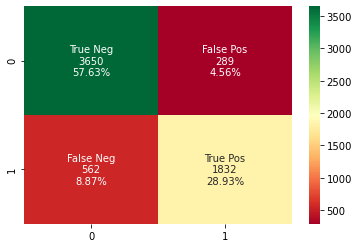

In [117]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in confusion.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap='RdYlGn')
plt.show()

In [118]:
# Predicted     not_churn    churn
# Actual
# not_churn        3670      269
# churn            611      1708  

In [119]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8656245065529765


##### Checking VIF's

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,India,6.18
5,Landing Page Submission,3.79
16,Unemployed,3.18
18,Other Cities,2.84
7,Olark Chat,2.72
3,Page Views Per Visit,2.47
19,lastnotable_Modified,2.22
1,TotalVisits,2.11
11,lstacv_Other Activity,2.07
4,Tag:response after reading email,1.91


In [121]:
# 'Student' has the high Pvalue. Let's drop it

X_train_new=X_train_sm.drop('Student',axis=1)

In [122]:
# MODEL 3

X_train_sm= sm.add_constant(X_train_new)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.0
Date:                Tue, 12 Oct 2021   Deviance:                       3895.9
Time:                        10:25:16   Pearson chi2:                 6.93e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.8603      0.231     -3.728      0.000      -1.313      -0.408
Do Not Email                        -1.0082      0.211     -4.783      0.000      -1.421      -0.595
TotalVisits                          0.3264      0.054      6.018      0.000       0.220       0.433
Total Time Spent on Website          1.0139      0.047     21.660      0.000       0.922       1.106
Page Views Per Visit                -0.3454      0.064     -5.359      0.000      -0.472      -0.219
Tag:response after reading email     4.3751      0.177     24.758      0.000       4.029       4.721
Landing Page Submission             -0.6768      0.126     -5.354      0.000      -0.924      -0.429
Lead Import                         -2.2281      0.711     -3.133      0.002      -3.622      -0.834
Olark Chat                           0.3392      0.201      1.687      0.092      -0.055       0.733
Other Sources                        1.8571      0.215      8.642      0.000       1.436       2.278
Reference                            2.2841      0.306      7.465      0.000       1.684       2.884
lstacv_Olark Chat Conversation      -1.3776      0.199     -6.907      0.000      -1.768      -0.987
lstacv_Other Activity               -0.5821      0.131     -4.432      0.000      -0.839      -0.325
lstacv_SMS Sent                      1.1394      0.096     11.930      0.000       0.952       1.327
India                               -0.8224      0.168     -4.904      0.000      -1.151      -0.494
Word Of Mouth                        0.3899      0.203      1.919      0.055      -0.008       0.788
Unemployed                           0.4546      0.092      4.949      0.000       0.275       0.635
Working Professional                 2.0298      0.249      8.141      0.000       1.541       2.518
Other Cities                        -0.2289      0.108     -2.123      0.034      -0.440      -0.018
lastnotable_Modified                -0.3771      0.099     -3.809      0.000      -0.571      -0.183
====================================================================================================
"""

In [123]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [124]:
y_train_pred[:10]

array([0.1713267 , 0.1713267 , 0.11385377, 0.1241862 , 0.99783464,
       0.03452496, 0.87338897, 0.03452496, 0.50444529, 0.14843503])

In [125]:
y_train_pred_final['conv_prob'] = y_train_pred
y_train_pred_final['Lead_Score'] =round(y_train_pred_final['conv_prob']*100)


In [126]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.conv_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,conv_prob,Pros_ID,Lead_Score,predicted
0,0,0.171327,8425,17.0,0
1,0,0.171327,8341,17.0,0
2,0,0.113854,7376,11.0,0
3,0,0.124186,7414,12.0,0
4,1,0.997835,3521,100.0,1


In [127]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8654666035054477


Overall accuracy has not dropped 

From the above MODEL 3 if we see 'Olark Chat' has the high Pvalue, so we will drop it.

In [128]:
X_train_new=X_train_sm.drop('Olark Chat',axis=1)

In [129]:
# # # MODEL 4

X_train_sm= sm.add_constant(X_train_new)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1949.4
Date:                Tue, 12 Oct 2021   Deviance:                       3898.8
Time:                        10:25:16   Pearson chi2:                 6.95e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.5891      0.165     -3.567      0.000      -0.913      -0.265
Do Not Email                        -1.0175      0.211     -4.817      0.000      -1.431      -0.604
TotalVisits                          0.3213      0.054      5.937      0.000       0.215       0.427
Total Time Spent on Website          1.0013      0.046     21.725      0.000       0.911       1.092
Page Views Per Visit                -0.3599      0.064     -5.614      0.000      -0.486      -0.234
Tag:response after reading email     4.3782      0.177     24.790      0.000       4.032       4.724
Landing Page Submission             -0.7457      0.119     -6.255      0.000      -0.979      -0.512
Lead Import                         -2.3349      0.710     -3.289      0.001      -3.726      -0.944
Other Sources                        1.6902      0.193      8.767      0.000       1.312       2.068
Reference                            2.0176      0.262      7.715      0.000       1.505       2.530
lstacv_Olark Chat Conversation      -1.3445      0.199     -6.773      0.000      -1.734      -0.955
lstacv_Other Activity               -0.5840      0.131     -4.450      0.000      -0.841      -0.327
lstacv_SMS Sent                      1.1322      0.095     11.868      0.000       0.945       1.319
India                               -1.0014      0.129     -7.759      0.000      -1.254      -0.748
Word Of Mouth                        0.4029      0.203      1.988      0.047       0.006       0.800
Unemployed                           0.4406      0.091      4.818      0.000       0.261       0.620
Working Professional                 2.0167      0.249      8.094      0.000       1.528       2.505
Other Cities                        -0.2432      0.107     -2.264      0.024      -0.454      -0.033
lastnotable_Modified                -0.3821      0.099     -3.861      0.000      -0.576      -0.188
====================================================================================================
"""

In [130]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [131]:
y_train_pred[:10]

array([0.1644125 , 0.1644125 , 0.11532977, 0.11837785, 0.99776691,
       0.03381747, 0.87900972, 0.03381747, 0.48676674, 0.14611272])

In [132]:
y_train_pred_final['conv_prob'] = y_train_pred
y_train_pred_final['Lead_Score'] = round(y_train_pred_final['conv_prob']*100)

In [133]:
# Creating new column 'predicted' with 1 if conv_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.conv_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,conv_prob,Pros_ID,Lead_Score,predicted
0,0,0.164412,8425,16.0,0
1,0,0.164412,8341,16.0,0
2,0,0.115330,7376,12.0,0
3,0,0.118378,7414,12.0,0
4,1,0.997767,3521,100.0,1


In [134]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8629401547449865


Accuracy is still same

From the MODEL 4 'Word Of Mouth' has the Pvalue ~ 0.05, so we will drop it.


In [135]:
X_train_new=X_train_sm.drop('Word Of Mouth',axis=1)

In [136]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [137]:
y_train_pred[:10]

array([0.1644125 , 0.1644125 , 0.11532977, 0.11837785, 0.99776691,
       0.03381747, 0.87900972, 0.03381747, 0.48676674, 0.14611272])

In [138]:
y_train_pred_final['conv_prob'] = y_train_pred
y_train_pred_final['Lead_Score'] = round(y_train_pred_final['conv_prob']*100)


In [139]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.conv_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,conv_prob,Pros_ID,Lead_Score,predicted
0,0,0.164412,8425,16.0,0
1,0,0.164412,8341,16.0,0
2,0,0.115330,7376,12.0,0
3,0,0.118378,7414,12.0,0
4,1,0.997767,3521,100.0,1


In [140]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8629401547449865


Overall accuracy is still same not making any much difference

## Finalise Model 4 as a FINAL MODEL

In [141]:
# Let us finalise as model 4 the final model

X_train_sm= sm.add_constant(X_train_new)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1951.3
Date:                Tue, 12 Oct 2021   Deviance:                       3902.6
Time:                        10:25:17   Pearson chi2:                 6.93e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.5655      0.165     -3.432      0.001      -0.888      -0.243
Do Not Email                        -1.0208      0.211     -4.838      0.000      -1.434      -0.607
TotalVisits                          0.3244      0.054      6.005      0.000       0.219       0.430
Total Time Spent on Website          1.0035      0.046     21.788      0.000       0.913       1.094
Page Views Per Visit                -0.3598      0.064     -5.619      0.000      -0.485      -0.234
Tag:response after reading email     4.3716      0.176     24.779      0.000       4.026       4.717
Landing Page Submission             -0.7369      0.119     -6.184      0.000      -0.970      -0.503
Lead Import                         -2.3324      0.710     -3.287      0.001      -3.723      -0.941
Other Sources                        1.6846      0.193      8.747      0.000       1.307       2.062
Reference                            2.0136      0.261      7.703      0.000       1.501       2.526
lstacv_Olark Chat Conversation      -1.3497      0.199     -6.797      0.000      -1.739      -0.961
lstacv_Other Activity               -0.5872      0.131     -4.475      0.000      -0.844      -0.330
lstacv_SMS Sent                      1.1292      0.095     11.848      0.000       0.942       1.316
India                               -0.9975      0.129     -7.734      0.000      -1.250      -0.745
Unemployed                           0.4379      0.091      4.790      0.000       0.259       0.617
Working Professional                 2.0091      0.249      8.075      0.000       1.521       2.497
Other Cities                        -0.2602      0.107     -2.431      0.015      -0.470      -0.050
lastnotable_Modified                -0.3807      0.099     -3.848      0.000      -0.575      -0.187
====================================================================================================
"""

##### Checking VIF's

In [142]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.13
4,Page Views Per Visit,2.43
13,India,2.23
6,Landing Page Submission,2.11
2,TotalVisits,2.10
11,lstacv_Other Activity,1.65
10,lstacv_Olark Chat Conversation,1.61
16,Other Cities,1.56
15,Working Professional,1.49
5,Tag:response after reading email,1.46


#### All variables has VIF <5. So we need not drop any more variables and we can proceed with making predictions using this model only

In [143]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3678,  261],
       [ 607, 1787]], dtype=int64)

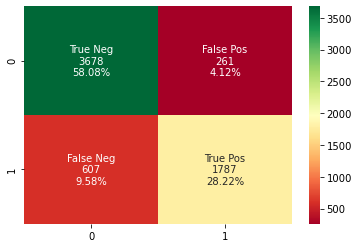

In [144]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in confusion.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap='RdYlGn')
plt.show()
# Actual/Predicted     not_churn    churn
        # not_churn        3675      264
        # churn            609       1785 

In [145]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8629401547449865

## Metrics beyond simply accuracy

In [146]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
Sensitivity=(TP / float(TP+FN))
print("Sensitivity: {0}".format(Sensitivity))

Sensitivity: 0.7464494569757728


In [148]:
# Let us calculate specificity
Specificity=TN / float(TN+FP)
print("Specificity: {0}".format(Specificity))

Specificity: 0.9337395277989338


In [149]:
# Calculate false postive rate - predicting Converted when customer does not Converted
False_positive_rate=FP/ float(TN+FP)
print("False Positive Rate: {0}".format(False_positive_rate))

False Positive Rate: 0.06626047220106626


In [150]:
# positive predictive value 
positive_predictive_value =TP / float(TP+FP)
print("Positive Predictive value: {0}".format(positive_predictive_value))

Positive Predictive value: 0.87255859375


In [151]:
# Negative predictive value
Negative_predictive_value=TN / float(TN+ FN)
print("Negative Predictive value: {0}".format(Negative_predictive_value))

Negative Predictive value: 0.8583430571761961


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [152]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [153]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.conv_prob, drop_intermediate = False )

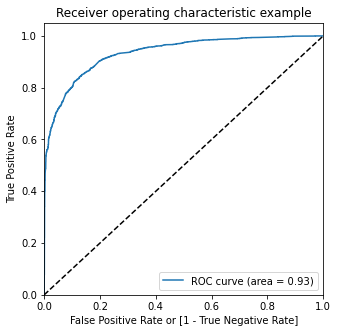

In [154]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.conv_prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [155]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.conv_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,conv_prob,Pros_ID,Lead_Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.164412,8425,16.0,0,1,1,0,0,0,0,0,0,0,0
1,0,0.164412,8341,16.0,0,1,1,0,0,0,0,0,0,0,0
2,0,0.115330,7376,12.0,0,1,1,0,0,0,0,0,0,0,0
3,0,0.118378,7414,12.0,0,1,1,0,0,0,0,0,0,0,0
4,1,0.997767,3521,100.0,1,1,1,1,1,1,1,1,1,1,1


In [156]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378020  1.000000  0.000000
0.1   0.1  0.716722  0.965748  0.565372
0.2   0.2  0.828359  0.916040  0.775070
0.3   0.3  0.859308  0.849624  0.865194
0.4   0.4  0.864203  0.799081  0.903783
0.5   0.5  0.862940  0.746449  0.933740
0.6   0.6  0.861361  0.708438  0.954303
0.7   0.7  0.852045  0.656642  0.970805
0.8   0.8  0.842413  0.614453  0.980960
0.9   0.9  0.825201  0.551378  0.991622


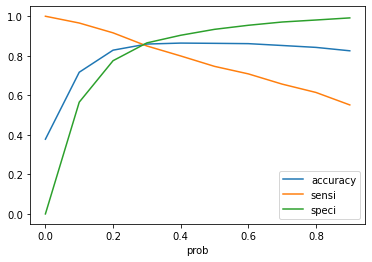

In [157]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [158]:
y_train_pred_final['final_predicted'] = y_train_pred_final.conv_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,conv_prob,Pros_ID,Lead_Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.164412,8425,16.0,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.164412,8341,16.0,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.115330,7376,12.0,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.118378,7414,12.0,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.997767,3521,100.0,1,1,1,1,1,1,1,1,1,1,1,1


In [159]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8593083846518238

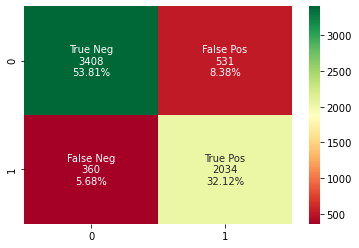

In [160]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in confusion2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in confusion2.flatten()/np.sum(confusion2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion2, annot=labels, fmt='', cmap='RdYlGn')
plt.show()

In [161]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.849624060150376

In [163]:
# Let us calculate specificity
TN / float(TN+FP)

0.8651942117288652

In [164]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.13480578827113482


In [165]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7929824561403509


In [166]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9044585987261147


## Precision and Recall

In [167]:
#Looking at the confusion matrix again

In [168]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3678,  261],
       [ 607, 1787]], dtype=int64)

##### Precision
TP / TP + FP

In [169]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.87255859375

##### Recall
TP / TP + FN

In [170]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7464494569757728

##### Using sklearn utilities for the same

In [171]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.87255859375

In [172]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7464494569757728

### Precision and recall tradeoff

In [173]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
 5       0
 6       1
 7       0
 8       1
 9       0
 10      1
 11      1
 12      1
 13      0
 14      1
 15      0
 16      0
 17      1
 18      0
 19      1
 20      0
 21      1
 22      0
 23      1
 24      0
 25      1
 26      1
 27      0
 28      0
 29      0
 30      0
 31      1
 32      0
 33      1
 34      1
 35      0
 36      0
 37      0
 38      0
 39      1
 40      1
 41      1
 42      0
 43      1
 44      0
 45      1
 46      0
 47      0
 48      0
 49      0
 50      1
 51      1
 52      0
 53      1
 54      0
 55      0
 56      0
 57      1
 58      1
 59      1
 60      1
 61      1
 62      0
 63      1
 64      0
 65      0
 66      1
 67      0
 68      1
 69      0
 70      1
 71      1
 72      1
 73      0
 74      0
 75      1
 76      0
 77      1
 78      0
 79      0
 80      0
 81      1
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      0
 89      1
 90      0

In [174]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.conv_prob)

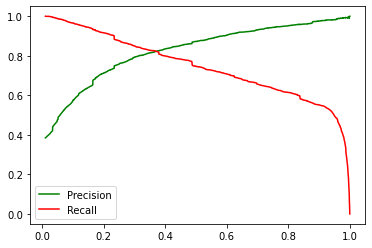

In [175]:
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')
plt.legend(['Precision','Recall'])
plt.show()

In [176]:
plt.plot?

###  Making predictions on the test set


In [177]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [178]:
X_train_new.columns

Index(['const', 'Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Tag:response after reading email',
       'Landing Page Submission', 'Lead Import', 'Other Sources', 'Reference',
       'lstacv_Olark Chat Conversation', 'lstacv_Other Activity',
       'lstacv_SMS Sent', 'India', 'Unemployed', 'Working Professional',
       'Other Cities', 'lastnotable_Modified'],
      dtype='object')

In [179]:
col=list(X_train_new.columns)
col.remove('const')
X_test = X_test[col]
X_test.shape


(2715, 17)

In [180]:
# Adding constant to the test set
X_test_sm = sm.add_constant(X_test)

In [181]:
#Making predictions on the test set of data
y_test_pred = res.predict(X_test_sm)

In [182]:
y_test_pred[:10]

4462    0.989795
5243    0.047047
4597    0.083110
4680    0.835805
5355    0.118674
7071    0.031419
6314    0.925041
2688    0.996170
6228    0.074481
3014    0.057421
dtype: float64

In [183]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4462,1
5243,0
4597,1
4680,1
5355,0


In [184]:
# Putting Pros_ID ID to index
y_test_df['Pros_ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [185]:
# Appending y_test_df and y_pred_1
y_pred_test_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [186]:
y_pred_test_final.head()

,Converted,Pros_ID,0
0,1,4462,0.989795
1,0,5243,0.047047
2,1,4597,0.083110
3,1,4680,0.835805
4,0,5355,0.118674


In [187]:
y_pred_test_final= y_pred_test_final.rename(columns={ 0 : 'conv_prob'})


In [188]:
y_pred_test_final['Lead_Score']=round(y_pred_test_final['conv_prob']*100)


In [189]:
y_pred_test_final = y_pred_test_final.reindex(['Pros_ID','Converted','Lead_Score','conv_prob'],axis=1)

In [190]:
y_pred_test_final['final_predicted'] = y_pred_test_final.conv_prob.map(lambda x: 1 if x > 0.3 else 0)

In [191]:
y_pred_test_final.head()

,Pros_ID,Converted,Lead_Score,conv_prob,final_predicted
0,4462,1,99.0,0.989795,1
1,5243,0,5.0,0.047047,0
2,4597,1,8.0,0.083110,0
3,4680,1,84.0,0.835805,1
4,5355,0,12.0,0.118674,0


In [192]:
metrics.accuracy_score(y_pred_test_final.Converted, y_pred_test_final.final_predicted)

0.8596685082872928

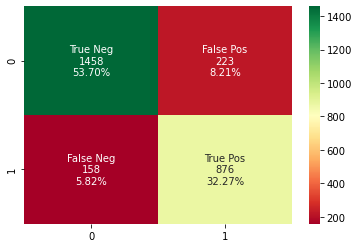

In [193]:
confusion_test = metrics.confusion_matrix(y_pred_test_final.Converted, y_pred_test_final.final_predicted )
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in confusion_test.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in confusion_test.flatten()/np.sum(confusion_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_test, annot=labels, fmt='', cmap='RdYlGn')
plt.show()

In [194]:
#Lets Go ahead and calculate the other metrices other than accuracy for the Test data
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [195]:
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
print("Sensitivity : {0}".format(sensitivity))

Sensitivity : 0.8471953578336557


In [196]:
# Let us calculate specificity
specificity=TN / float(TN+FP)
print("Specificity : {0}".format(specificity))

Specificity : 0.8673408685306365


In [197]:
precision=precision_score(y_pred_test_final.Converted, y_pred_test_final.final_predicted)
recall=recall_score(y_pred_test_final.Converted, y_pred_test_final.final_predicted)
print("Precision : {0}".format(precision))
print("Recall : {0}".format(recall))

Precision : 0.7970882620564149
Recall : 0.8471953578336557


## Final Interpretation of the Model:

It seems Final model works well , with Train as well Test data. It is safe to assume our model generalises well for unknown data too.
We have chosen a threshold such that we maintain a we have got sensitivity - specificity balance and prescision - recall balance

#### METRICES ON THE TRAIN DATA

* Accuracy:86%
* Sensitivity:85%
* Specificity:87%
* Precision:87%
* Recall:75%

#### METRICES ON THE TEST DATA

* Accuracy:86%
* Sensitivity:85%
* Specificity:86%
* Precision: 80%
* Recall:85%

# Using Precision - Recall metrics values  according to Business Needs.

### Scenario 1:
If the Business chose to make aggressive lead conversions, or when they have resources available to concentrate on more conversion,it is intuitive to concentrate on the positive values for the conversion , i.e when a lead is identified as hot lead. So at this point,our aim is to call as many as possible at the same time use resources wisely , so it is ok if someone is identified as hot leads by mistake but I dont want to miss out the chance of acquiring a lead conversion by wrongly predicting lead as cold.

In our *statistical terms* , it is ok if I have *less precision value* .For this to happen, we must choose a threshold such that the model is **lenient  with FALSE POSITIVES** and **aggressive in reducing False Negatives**.

Note:
Precision = TP / TP + FP

Recall = TP / TP + FN


In [198]:
y_pred_test_aggressive_conversion=y_pred_test_final
y_pred_test_aggressive_conversion.head(3)

,Pros_ID,Converted,Lead_Score,conv_prob,final_predicted
0,4462,1,99.0,0.989795,1
1,5243,0,5.0,0.047047,0
2,4597,1,8.0,0.083110,0


In [199]:
y_pred_test_aggressive_conversion['final_predicted']=y_pred_test_aggressive_conversion.conv_prob.apply(lambda x:1 if x>0.2 else 0)
y_pred_test_aggressive_conversion.head(3)

,Pros_ID,Converted,Lead_Score,conv_prob,final_predicted
0,4462,1,99.0,0.989795,1
1,5243,0,5.0,0.047047,0
2,4597,1,8.0,0.083110,0


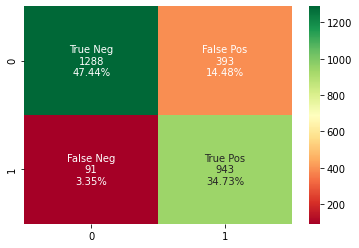

In [200]:
confusion_agg = metrics.confusion_matrix(y_pred_test_aggressive_conversion.Converted, y_pred_test_aggressive_conversion.final_predicted )
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in confusion_agg.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in confusion_agg.flatten()/np.sum(confusion_agg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_agg, annot=labels, fmt='', cmap='RdYlGn')
plt.show()

In [201]:
#Check their precision and recall scores
precision=precision_score(y_pred_test_aggressive_conversion.Converted, y_pred_test_aggressive_conversion.final_predicted)
recall=recall_score(y_pred_test_aggressive_conversion.Converted, y_pred_test_aggressive_conversion.final_predicted)
print("Precision : {0}".format(precision))
print("Recall : {0}".format(recall))

Precision : 0.7058383233532934
Recall : 0.9119922630560928


In [202]:
#Other metrices
accuracy=metrics.accuracy_score(y_pred_test_aggressive_conversion.Converted, y_pred_test_aggressive_conversion.final_predicted)
print("Accuracy : {0}".format(accuracy))
TP = confusion_agg[1,1] # true positive 
TN = confusion_agg[0,0] # true negatives
FP = confusion_agg[0,1] # false positives
FN = confusion_agg[1,0] # false negatives
sensitivity=TP / float(TP+FN)
print("Sensitivity : {0}".format(sensitivity))
# Let us calculate specificity
specificity=TN / float(TN+FP)
print("Specificity : {0}".format(specificity))

Accuracy : 0.8217311233885819
Sensitivity : 0.9119922630560928
Specificity : 0.7662105889351577


**Thus we have increased recall by 7 % which is actually good for making business aggressive i.e False Negatives are decreased , we have captured as many possible conversions through this cutoff.**

### Scenario 2:

If the Business chose to make use of resources wisely concentrate on more conversion that will actually get converted. So at this point,our aim is to call the leads if we are very confident  that they will become hot lead ,So I want to minimise the wrong prediction where a cold lead is predicted as hot.

In our statistical terms , my aim is to have more precision value .For this to happen, we must choose a threshold such that the model is intolerant to **FALSE POSITIVES** but lineant to **FALSE NEGATIVES**.


In [203]:
y_pred_test_absolute_conversion=y_pred_test_final
y_pred_test_absolute_conversion.head(3)

,Pros_ID,Converted,Lead_Score,conv_prob,final_predicted
0,4462,1,99.0,0.989795,1
1,5243,0,5.0,0.047047,0
2,4597,1,8.0,0.083110,0


In [204]:
y_pred_test_absolute_conversion['final_predicted']=y_pred_test_absolute_conversion.conv_prob.apply(lambda x:1 if x>0.6 else 0)
y_pred_test_absolute_conversion.head(3)

,Pros_ID,Converted,Lead_Score,conv_prob,final_predicted
0,4462,1,99.0,0.989795,1
1,5243,0,5.0,0.047047,0
2,4597,1,8.0,0.083110,0


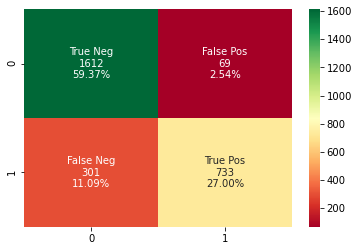

In [205]:
confusion_abs = metrics.confusion_matrix(y_pred_test_absolute_conversion.Converted, y_pred_test_absolute_conversion.final_predicted )
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in confusion_abs.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in confusion_abs.flatten()/np.sum(confusion_abs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_abs, annot=labels, fmt='', cmap='RdYlGn')
plt.show()

In [206]:
#Check their precision and recall scores
precision=precision_score(y_pred_test_absolute_conversion.Converted, y_pred_test_absolute_conversion.final_predicted)
recall=recall_score(y_pred_test_absolute_conversion.Converted, y_pred_test_absolute_conversion.final_predicted)
print("Precision : {0}".format(precision))
print("Recall : {0}".format(recall))

Precision : 0.9139650872817955
Recall : 0.7088974854932302


In [207]:
#Other metrices
accuracy=metrics.accuracy_score(y_pred_test_absolute_conversion.Converted, y_pred_test_absolute_conversion.final_predicted)
print("Accuracy : {0}".format(accuracy))
TP = confusion_abs[1,1] # true positive 
TN = confusion_abs[0,0] # true negatives
FP = confusion_abs[0,1] # false positives
FN = confusion_abs[1,0] # false negatives
sensitivity=TP / float(TP+FN)
print("Sensitivity : {0}".format(sensitivity))
# Let us calculate specificity
specificity=TN / float(TN+FP)
print("Specificity : {0}".format(specificity))

Accuracy : 0.8637200736648251
Sensitivity : 0.7088974854932302
Specificity : 0.9589530041641879


**Thus we have increased precision by 10 % , thus making the call only when it is sure , even if sales team have left out some people due to wrongly identifying as cold lead(False Negatives).Business Does not have to waste Sales resources on persons predicted as hot by mistakes (False Positives)**

# Recommendation for Business:

 #### The top 5 variables that has most that make lead to Hot leads are,
  * When the Tag of the lead is updated with **status response after reading email** , they are Hot leads.
  * When Lead origin is **lead import** , the person most likely considered as cold lead.
  * When the lead is identified using **Reference** , most likely he will be converted.
  * When a lead is a **working professional** , then the sales team should look up for this person, following up continously.
  * When a lead is identified through **Olark chat** , he is more likely to go cold.
  
  These are some of the factors to keep in mind, while the sales team is followup for conversion of potential leads/Hot leads.
  Thus using this model the conversion rate can go from 30% to 80%.
  
 